In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import string

In [2]:
# !pip install wordcloud
# nltk.download('punkt')

In [3]:
albums = {
    "name": "Taylor Swift",
    "songs" : {
                "title":"Tim McGraw", 
                "lyrics": """
                                    He said the way my blue eyes shined
                                    Put those Georgia stars to shame that night
                                    I said, "That's a lie"
                                    Just a boy in a Chevy truck
                                    That had a tendency of gettin' stuck
                                    On back roads at night
                                    And I was right there beside him all summer long
                                    And then the time we woke up to find that summer gone

                                    But when you think Tim McGraw
                                    I hope you think my favorite song
                                    The one we danced to all night long
                                    The moon like a spotlight on the lake
                                    When you think happiness
                                    I hope you think that little black dress
                                    Think of my head on your chest
                                    And my old faded blue jeans
                                    When you think Tim McGraw
                                    I hope you think of me

                                    September saw a month of tears
                                    And thankin' God that you weren't here
                                    To see me like that
                                    But in a box beneath my bed
                                    Is a letter that you never read
                                    From three summers back
                                    It's hard not to find it all a little bittersweet
                                    And lookin' back on all of that, it's nice to believe

                                    When you think Tim McGraw
                                    I hope you think my favorite song
                                    The one we danced to all night long
                                    The moon like a spotlight on the lake
                                    When you think happiness
                                    I hope you think that little black dress
                                    Think of my head on your chest
                                    And my old faded blue jeans
                                    When you think Tim McGraw
                                    I hope you think of me

                                    And I'm back for the first time since then
                                    I'm standin' on your street
                                    And there's a letter left on your doorstep
                                    And the first thing that you'll read is:

                                    "When you think Tim McGraw
                                    I hope you think my favorite song
                                    Someday you'll turn your radio on
                                    I hope it takes you back to that place"

                                    When you think happiness
                                    I hope you think that little black dress
                                    Think of my head on your chest
                                    And my old faded blue jeans
                                    When you think Tim McGraw
                                    I hope you think of me

                                    Oh, think of me
                                    Mmmm

                                    He said the way my blue eyes shined
                                    Put those Georgia stars to shame that night
                                    I said, "That's a lie
                                    """
              }
}

In [4]:
taylorswift = """
"Tim McGraw"

He said the way my blue eyes shined
Put those Georgia stars to shame that night
I said, "That's a lie"
Just a boy in a Chevy truck
That had a tendency of gettin' stuck
On back roads at night
And I was right there beside him all summer long
And then the time we woke up to find that summer gone

But when you think Tim McGraw
I hope you think my favorite song
The one we danced to all night long
The moon like a spotlight on the lake
When you think happiness
I hope you think that little black dress
Think of my head on your chest
And my old faded blue jeans
When you think Tim McGraw
I hope you think of me

September saw a month of tears
And thankin' God that you weren't here
To see me like that
But in a box beneath my bed
Is a letter that you never read
From three summers back
It's hard not to find it all a little bittersweet
And lookin' back on all of that, it's nice to believe

When you think Tim McGraw
I hope you think my favorite song
The one we danced to all night long
The moon like a spotlight on the lake
When you think happiness
I hope you think that little black dress
Think of my head on your chest
And my old faded blue jeans
When you think Tim McGraw
I hope you think of me

And I'm back for the first time since then
I'm standin' on your street
And there's a letter left on your doorstep
And the first thing that you'll read is:

"When you think Tim McGraw
I hope you think my favorite song
Someday you'll turn your radio on
I hope it takes you back to that place"

When you think happiness
I hope you think that little black dress
Think of my head on your chest
And my old faded blue jeans
When you think Tim McGraw
I hope you think of me

Oh, think of me
Mmmm

He said the way my blue eyes shined
Put those Georgia stars to shame that night
I said, "That's a lie"

"Picture To Burn"

State the obvious, I didn't get my perfect fantasy
I realize you love yourself more than you could ever love me
So go and tell your friends that I'm obsessive and crazy
That's fine I'll tell mine that you're gay!
By the way...

I hate that stupid old pickup truck
You never let me drive
You're a redneck heartbreak
Who's really bad at lying
So watch me strike a match
On all my wasted time
As far as I'm concerned
You're just another picture to burn!

There's no time for tears
I'm just sitting here planning my revenge
There's nothing stopping me
From going out with all of your best friends
And if you come around saying sorry to me
My daddy's gonna show you how sorry you'll be

'Cause I hate that stupid old pickup truck
You never let me drive
You're a redneck heartbreak
Who's really bad at lying
So watch me strike a match
On all my wasted time
As far as I'm concerned
You're just another picture to burn!

And if you're missing me
You'd better keep it to yourself
'Cause coming back around here
Would be bad for your health...

'Cause I hate that stupid old pickup truck
You never let me drive
You're a redneck heartbreak
Who's really bad at lying
So watch me strike a match
On all my wasted time
In case you haven't heard
I really really hate that...

Stupid old pickup truck
You never let me drive
You're a redneck heartbreak
Who's really bad at lying
So watch me strike a match
On all my wasted time
As far as I'm concerned
You're just another picture to burn!

Burn, burn, burn, baby, burn
You're just another picture to burn
Baby, burn...

"Teardrops On My Guitar"

Drew looks at me
I fake a smile so he won't see
That I want and I'm needing
Everything that we should be

I'll bet she's beautiful, that girl he talks about
And she's got everything that I have to live without

Drew talks to me
I laugh 'cause it's just so funny
That I can't even see
Anyone when he's with me

He says he's so in love, he's finally got it right
I wonder if he knows he's all I think about at night

He's the reason for the teardrops on my guitar
The only thing that keeps me wishing on a wishing star
He's the song in the car I keep singing. Don't know why I do

Drew walks by me
Can he tell that I can't breathe?
And there he goes, so perfectly
The kind of flawless I wish I could be

She'd better hold him tight, give him all her love
Look in those beautiful eyes and know she's lucky 'cause

He's the reason for the teardrops on my guitar
The only thing that keeps me wishing on a wishing star
He's the song in the car I keep singing. Don't know why I do

So, I drive home alone
As I turn out the light
I'll put his picture down
And maybe get some sleep tonight

'Cause he's the reason for the teardrops on my guitar
The only one who's got enough of me to break my heart
He's the song in the car I keep singing. Don't know why I do

He's the time taken up, but there's never enough
And he's all that I need to fall into

Drew looks at me
I fake a smile so he won't see

"A Place In This World"

I don't know what I want, so don't ask me
'Cause I'm still trying to figure it out
Don't know what's down this road, I'm just walking
Trying to see through the rain coming down
Even though I'm not the only one
Who feels the way I do

I'm alone, on my own, and that's all I know
I'll be strong, I'll be wrong, oh but life goes on
Oh, I'm just a girl, trying to find a place in this world

Got the radio on, my old blue jeans
And I'm wearing my heart on my sleeve
Feeling lucky today, got the sunshine
Could you tell me what more do I need
And tomorrow's just a mystery, oh yeah
But that's OK

I'm alone, on my own, and that's all I know
I'll be strong, I'll be wrong, oh but life goes on
Oh, I'm just a girl, trying to find a place in this world

Maybe I'm just a girl on a mission
But I'm ready to fly

I'm alone, on my own, and that's all I know
I'll be strong, I'll be wrong, oh but life goes on
Oh I'm alone, on my own, and that's all I know
Oh I'm just a girl, trying to find a place in this world

Oh I'm just a girl
Oh I'm just a girl, oh, oh
Oh I'm just a girl 

"Cold As You"

You have a way of coming easily to me
And when you take, you take the very best of me
So I start a fight 'cause I need to feel something
And you do what you want 'cause I'm not what you wanted

Oh, what a shame, what a rainy ending given to a perfect day
Just walk away, ain't no use defending words that you will never say
And now that I'm sitting here thinking it through
I've never been anywhere cold as you

You put up walls and paint them all a shade of gray
And I stood there loving you and wished them all away
And you come away with a great little story
Of a mess of a dreamer with the nerve to adore you

Oh, what a shame, what a rainy ending given to a perfect day
So just walk away, ain't no use defending words that you will never say
And now that I'm sitting here thinking it through
I've never been anywhere cold as you

You never did give a damn thing, honey, but I cried, cried for you
And I know you wouldn't have told nobody if I died, died for you, died for you

Oh, what a shame, what a rainy ending given to a perfect day
Every smile you fake is so condescending counting all the scars you made
And now that I'm sitting here thinking it through
I've never been anywhere cold as you


"The Outside"

I didn't know what I would find
When I went looking for a reason
I know I didn't read between the lines
And, baby, I've got nowhere to go

I tried to take the road less traveled by
But nothing seems to work the first few times
Am I right?

So how can I ever try to be better?
Nobody ever lets me in
I can still see you
This ain't the best view
On the outside looking in
And I've been a lot of lonely places
I've never been on the outside

You saw me there, but never knew
That I would give it all up to be
A part of this, a part of you
And now it's all too late. So you see

You could've helped if you had wanted to
But no one notices until it's too late to do anything

So how can I ever try to be better?
Nobody ever lets me in
I can still see you
This ain't the best view
On the outside looking in
And I've been a lot of lonely places
I've never been on the outside

Oh, yeah

So how can I ever try to be better?
Nobody ever lets me in
And I can still see you
This ain't the best view
On the outside looking in
And I've been a lot of lonely places
I've never been on the outside 

"Tied Together With A Smile"

Seems the only one who doesn't see your beauty
Is the face in the mirror looking back at you
You walk around here thinking you're not pretty
But that's not true 'cause I know you

Hold on, baby, you're losing it
The water's high, you're jumping into it
And letting go
And no one knows
That you cry, but you don't tell anyone
That you might not be the golden one
And you're tied together with a smile
But you're coming undone

I guess it's true that love was all you wanted
'Cause you're giving it away like it's extra change
Hoping it will end up in his pocket
But he leaves you out like a penny in the rain

Oh, 'cause it's not his price to pay
It's not his price to pay

Hold on, baby, you're losing it
The water's high, you're jumping into it
And letting go
And no one knows
That you cry, but you don't tell anyone
That you might not be the golden one
And you're tied together with a smile
But you're coming undone

Hold on, baby, you're losing it
The water's high, you're jumping into it
And letting go
And no one knows
That you cry, but you don't tell anyone
That you might not be the golden one
And you're tied together with a smile
But you're coming undone

You're tied together with a smile
But you're coming undone
Goodbye, baby
With a smile, baby, baby 

"Stay Beautiful"

Cory's eyes are like a jungle
He smiles, it's like the radio
He whispers songs into my window
In words that nobody knows
There's pretty girls on every corner
That watch him as he's walking home
Saying, "Does he know?"
Will you ever know?

You're beautiful
Every little piece love
And don't you know
You're really gonna be someone
Ask anyone
And when you find everything you looked for
I hope your life leads you back to my door
Oh, but if it don't
Stay beautiful

Cory finds another way to be
The highlight of my day
I'm taking pictures in my mind
So I can save them for a rainy day
It's hard to make a conversation
When he's taking my breath away
I should say, hey, by the way

You're beautiful
Every little piece love
And don't you know
You're really gonna be someone
Ask anyone
And when you find everything you looked for
I hope your life leads you back to my door
Oh, but if it don't
Stay beautiful

If you and I are a story
That never gets told
If what you are is a daydream
I'll never get to hold
At least you'll know

You're beautiful
Every little piece love
And don't you know
You're really gonna be someone
Ask anyone
And when you find everything you looked for
I hope your life leads you back to my front door
Oh, but if it don't
Will you stay
Beautiful, beautiful, beautiful
Beautiful, beautiful, beautiful?
La la la
Oh, oh, oh, oh
Oh, but if it don't
Stay beautiful
Stay beautiful
Na, na, na, na, na 

"Should've Said No"

It's strange to think the songs we used to sing
The smiles, the flowers, everything is gone
Yesterday I found out about you
Even now just looking at you feels wrong

You say that you'd take it all back, given one chance
It was a moment of weakness and you said, "Yes."

You should've said "No", you should've gone home
You should've thought twice 'fore you let it all go
You should've known that word
'Bout what you did with her'd
Get back to me (get back to me).
And I should've been there in the back of your mind
I shouldn't be asking myself, "Why?"
You shouldn't be begging for forgiveness at my feet...
You should've said "No", baby, and you might still have me

You can see that I've been crying
And baby, you know all the right things to say
But do you honestly expect me to believe
We could ever be the same?

You say that the past is the past, you need one chance
It was a moment of weakness and you said, "Yes."

You should've said "No", you should've gone home
You should've thought twice 'fore you let it all go
You should've known that word
'Bout what you did with her'd,
Get back to me (get back to me).
And I should've been there in the back of your mind
I shouldn't be asking myself, "Why?"
You shouldn't be begging for forgiveness at my feet...
You should've said "No", baby, and you might still have me

I can't resist
Before you go, tell me this:
Was it worth it?
Was she worth this?

No... no, no, no...

You should've said "No", you should've gone home
You should've thought twice 'fore you let it all go
You should've known that word
'Bout what you did with her'd,
Get back to me (get back to me).
And I should've been there in the back of your mind
I shouldn't be asking myself, "Why?"
You shouldn't be begging for forgiveness at my feet...
You should've said "No", baby, and you might still have me 

"Mary's Song (Oh My My My)"

She said, I was seven and you were nine
I looked at you like the stars that shined
In the sky, the pretty lights
And our daddies used to joke about the two of us
Growing up and falling in love and our mamas smiled
And rolled their eyes and said, "Oh my, my, my"

Take me back to the house in the backyard tree
Said you'd beat me up, you were bigger than me
You never did, you never did
Take me back when our world was one block wide
I dared you to kiss me and ran when you tried
Just two kids, you and I
Oh my, my, my, my

Well, I was sixteen when suddenly
I wasn't that little girl you used to see
But your eyes still shined like pretty lights
And our daddies used to joke about the two of us
They never believed we'd really fall in love
And our mamas smiled and rolled their eyes
And said, "Oh my, my, my"

Take me back to the creek beds we turned up
Two A.M. riding in your truck and all I need is you next to me
Take me back to the time we had our very first fight
The slamming of doors instead of kissing goodnight
You stayed outside 'til the morning light
Oh my, my, my, my

A few years had gone and come around
We were sitting at our favorite spot in town
And you looked at me, got down on one knee

Take me back to the time when we walked down the aisle
Our whole town came and our mamas cried
You said "I do" and I did too
Take me home where we met so many years before
We'll rock our babies on that very front porch
After all this time, you and I

I'll be eighty-seven; you'll be eighty-nine
I'll still look at you like the stars that shine
In the sky, oh my, my, my

"Our Song"

I was riding shotgun
With my hair undone
In the front seat of his car
He's got a one-hand feel
On the steering wheel
The other on my heart
I look around, turn the radio down
He says, "Baby, is something wrong?"
I say, "Nothing
I was just thinking
How we don't have a song"
And he says...

Our song is the slamming screen door
Sneakin' out late, tapping on your window
When we're on the phone and you talk real slow
'Cause it's late and your mama don't know
Our song is the way you laugh
The first date: "Man, I didn't kiss her, and I should have."
And when I got home ... 'fore I said, "Amen"
Asking God if he could play it again

I was walking up
The front porch steps
After everything that day
Had gone all wrong
And been trampled on
And lost and thrown away
Got to the hallway,
Well, on my way
To my lovin' bed
I almost didn't notice
All the roses
And the note that said...

Our song is the slamming screen door
Sneakin' out late, tapping on your window
When we're on the phone and you talk real slow
'Cause it's late and your mama don't know
Our song is the way you laugh
The first date: "Man, I didn't kiss her, and I should have"
And when I got home ... 'fore I said, "Amen"
Asking God if he could play it again

I've heard every album, listened to the radio
Waited for something to come along
That was as good as our song...

'Cause our song is the slamming screen door
Sneakin' out late, tapping on his window
When we're on the phone and he talks real slow
'Cause it's late and his mama don't know
Our song is the way he laughs
The first date: "Man, I didn't kiss him, and I should have"
And when I got home ... 'fore I said, "Amen"
Asking God if he could play it again
Play it again

Oh, yeah...
Oh-oh, yeah

I was riding shotgun
With my hair undone
In the front seat of his car
I grabbed a pen
And an old napkin
And I wrote down our song 

"I'm Only Me When I'm With You"

Friday night beneath the stars
In a field behind your yard
You and I are paintin' pictures in the sky
And sometimes we don't say a thing
Just listen to the crickets sing
Everything I need is right here by my side

And I know everything about you
I don't wanna live without you

I'm only up when you're not down
Don't wanna fly if you're still on the ground
It's like no matter what I do
Well, you drive me crazy half the time
The other half I'm only tryna let you know that what I feel is true
And I'm only me when I'm with you

Just a small town boy and girl
Livin' in a crazy world
Tryna figure out what is and isn't true
And I don't try to hide my tears
My secrets or my deepest fears
Through it all nobody gets me like you do

And you know everything about me
You say that you can't live without me

I'm only up when you're not down
Don't wanna fly if you're still on the ground
It's like no matter what I do
Well, you drive me crazy half the time
The other half I'm only tryna let you know that what I feel is true
And I'm only me when I'm with you

When I'm with anybody else
It's so hard to be myself
And only you can tell

...That I'm only up when you're not down
Don't wanna fly if you're still on the ground
It's like no matter what I do
Well, you drive me crazy half the time
The other half I'm only tryna let you know that what I feel is true
And I'm only me
Who I wanna be
Well, I'm only me when I'm with you
With you 

"Invisible"

She can't see the way your eyes
Light up when you smile
She'll never notice how you stop and stare
Whenever she walks by

And you can't see me wantin' you the way you want her
But you are everything to me

And I just wanna show you
She don't even know you
She's never gonna love you like I want to
And you just see right through me
But if you only knew me
We could be a beautiful
Miracle
Unbelievable
Instead of just invisible

There's a fire inside of you
That can't help but shine through
She's never gonna see the light
No matter what you do

And all I think about is how to make you think of me
And everything that we could be

I just wanna show you
She don't even know you
She's never gonna love you like I want to
And you just see right through me
But if you only knew me
We could be a beautiful
Miracle
Unbelievable
Instead of just invisible

Like shadows in a faded light
Oh, we're invisible
I just wanna open your eyes
And make you realize

I just wanna show you
She don't even know you
Baby, let me love you
Let me want you
You just see right through me
But if you only knew me
We could be a beautiful
Miracle
Unbelievable
Instead of just invisible

She can't see the way your eyes
Light up when you smile

"A Perfectly Good Heart"

Why would you wanna break a perfectly good heart?
Why would you wanna take our love and tear it all apart, now?
Why would you wanna make the very first scar?
Why would you wanna break a perfectly good heart?

Maybe I should've seen the signs, should've read the writing on the wall
And realized by the distance in your eyes that I would be the one to fall
No matter what you say, I still can't believe
That you would walk away
It don't make sense to me, but

Why would you wanna break a perfectly good heart?
Why would you wanna take our love and tear it all apart, now?
Why would you wanna make the very first scar?
Why would you wanna break a perfectly good heart?

It's not unbroken anymore
How do I get it back the way it was before?

Why would you wanna break a perfectly good heart?
Why would you wanna take our love and tear it all apart, now?
Why would you wanna make the very first scar?
Why would you wanna break, would you wanna break a

Why would you wanna break a perfectly good heart?
Why would you wanna take our love and tear it all apart, now?
Why would you wanna make the very first scar?
Why would you wanna break a perfectly good heart? 

"""

In [5]:
fearless = """
"Jump Then Fall"

I like the way you sound in the morning
We're on the phone and without a warning
I realize your laugh is the best sound
I have ever heard

I like the way I can't keep my focus
I watch you talk, you didn't notice
I hear the words but all I can think is
We should be together
Every time you smile, I smile
And every time you shine, I'll shine for you

Whoa, oh, I'm feeling you baby
Don't be afraid to
Jump then fall
Jump then fall into me
Baby, I'm never gonna leave you
Say that you wanna be with me too
'Cause I'mma stay through it all
So jump then fall

Well, I like the way your hair falls in your face
You got the keys to me
I love each freckle on your face, oh
I've never been so wrapped up, honey
I like the way you're everything I ever wanted

I had time to think it all over
And all I can say is come closer
Take a deep breath and jump then fall into me
'Cause every time you smile, I smile
And every time you shine, I'll shine for you

Whoa, oh, I'm feeling you baby
Don't be afraid to
Jump then fall
Jump then fall into me
Baby, I'm never gonna leave you
Say that you wanna be with me too
'Cause I'mma stay through it all
So jump then fall

The bottom's gonna drop out from under our feet
I'll catch you, I'll catch you
When people say things that bring you to your knees
I'll catch you
The time is gonna come when you're so mad you could cry
But I'll hold you through the night until you smile

Whoa, oh, I need you baby
Don't be afraid, please,
Jump then fall
Jump then fall into me
Baby, I'm never gonna leave you
Say that you wanna be with me too
'Cause I'mma stay through it all
So jump then fall
Jump then fall, baby,
Jump then fall into me, into me

Every time you smile, I smile
And every time you shine, I'll shine
And every time you're here
Baby I'll show you, I'll show you
You can jump then fall, jump then fall
Jump then fall into me, into me, yeah

"Untouchable"

Untouchable like a distant diamond sky
I'm reaching out and I just can't tell you why
I'm caught up in you
I'm caught up in you

Untouchable, burning brighter than the sun
And when you're close I feel like coming undone

In the middle of the night
When I'm in this dream
It's like a million little stars
Spelling out your name
You gotta come on, come on
Say that we'll be together
Come on, come on
Little taste of Heaven

It's half full, and I won't wait here all day
I know you're saying that you'd be here anyway

But you're untouchable, burning brighter than the sun
And now that you're close I feel like coming undone

In the middle of the night
When I'm in this dream
It's like a million little stars
Spelling out your name
You gotta come on, come on
Say that we'll be together
Come on, come on

Oh, in the middle of the night
Waking from this dream
I wanna feel you by my side
Standing next to me
You gotta come on, come on
Say that we'll be together
Come on, come on
Little taste of Heaven

I'm caught up in you. Oh, oh

But you're untouchable, burning brighter than the sun
Now that you're close I feel like coming undone

In the middle of the night
When I'm in this dream
It's like a million little stars
Spelling out your name
You gotta come on, come on
Say that we'll be together
Come on, come on, oh, oh

In the middle of the night
When I'm in this dream
It's like a million little stars
Spelling out your name
You gotta come on, come on
Say that we'll be together
Come on, come on, come on

In the middle of the night
Waking from this dream
I wanna feel you by my side
Standing next to me
You gotta come on, come on
Say that we'll be together
Come on, come on
Little taste of Heaven

In the middle of the night
When I'm in this dream
It's like a million little stars
Spelling out your name
You gotta come on, come on
Come on, come on
Come on, come on, oh, oh, oh

Like a million little stars
Spelling out your name
They're spelling out your name, oh 


"Forever & Always (Piano Version)"

Once upon a time
I believe it was a Tuesday when I caught your eye
We caught onto something
I hold onto the night
You looked me in the eye and told me you loved me
Were you just kidding?
'Cause it seems to me
This thing is breaking down, we almost never speak
I don't feel welcome anymore
Baby, what happened? Please tell me
'Cause one second it was perfect
Now you're halfway out the door

And I stare at the phone
He still hasn't called
And then you feel so low
You can't feel nothing at all
And you flashback to
When he said "forever and always"
Oh, and it rains in your bedroom
Everything is wrong
It rains when you're here
And it rains when you're gone
I was there when you said "forever and always"

Was I out of line?
Did I say something way too honest?
Made you run and hide like a scared little boy
I looked into your eyes
Thought I knew you for a minute now I'm not so sure
So here's to everything coming down to nothing
Here's to silence that cuts me to the core
Where is this going?
Thought I knew for a minute but I don't anymore

And I stare at the phone
He still hasn't called
And then you feel so low
You can't feel nothing at all
And you flashback to
When he said "forever and always"
And it rains in your bedroom
Everything is wrong
It rains when you're here
And it rains when you're gone
I was there when you said "forever and always"

You didn't mean it baby
I don't think so, oh oh oh
Back up, baby back up
Did you forget everything?
Back up, baby back up
Did you forget everything?

Back up, baby back up
Please back up, oh back up
Back up, baby back up

'Cause it rains in your bedroom
Everything is wrong
It rains when you're here
And it rains when you're gone
I was there when you said "forever and always"

And I stare at the phone
He still hasn't called
And then you feel so low
You can't feel nothing at all
And you flashback to
When we said "forever and always"
'Cause it rains in your bedroom
Everything is wrong
It rains when you're here
And it rains when you're gone
I was there when you said "forever and always"

You didn't mean it baby
You said "forever and always", yeah 

"Come In With The Rain"

I could go back to every laugh
But I don't wanna go there anymore
And I know all the steps up to your door
But I don't wanna go there anymore

Talk to the wind, talk to the sky
Talk to the man with the reasons why
And let me know what you find

I'll leave my window open
'Cause I'm too tired at night to call your name
Just know I'm right here hopin'
That you'll come in with the rain

I could stand up and sing you a song
But I don't wanna have to go that far
And I, I've got you down
I know you by heart
And you don't even know where I start

Talk to yourself, talk to the tears
Talk to the man who put you here
And don't wait for the sky to clear

I'll leave my window open
'Cause I'm too tired at night to call your name
Oh, just know I'm right here hopin'
That you'll come in with the rain

I've watched you so long
Screamed your name
I don't know what else I can say

But I'll leave my window open
'Cause I'm too tired at night for all these games
Just know I'm right here hopin'
That you'll come in with the rain

I could go back to every laugh
But I don't wanna go there anymore 

"Superstar"

This is wrong but I can't help but feel like
There ain't nothing more right babe
Misty morning comes again and I can't
Help but wish I could see your face
And I knew from the first note played
I'd be breaking all my rules to see you
You smile that beautiful smile and
All the girls in the front row scream your name

So dim that spotlight, tell me things like
I can't take my eyes off of you
I'm no one special, just another
Wide eyed girl who's desperately in love with you
Give me a photograph to hang on my wall, superstar

Morning loneliness, comes around when I'm not
Dreaming about you
When my world wakes up today
You'll be in another town
And I knew when I saw your face, I'd be
Counting down the ways to see you
You smile that beautiful smile and
All the girls in the front row scream your name

So dim that spotlight, tell me things like
I can't take my eyes off of you
I'm no one special, just another
Wide eyed girl who's desperately in love with you
Give me a photograph to hang on my wall, superstar

You played in bars, you play guitar
And I'm invisible and everyone knows who you are
And you'll never see, you sing me to sleep
Every night from the radio

So dim that spotlight, tell me things like
I can't take my eyes off of you
I'm no one special, just another
Wide eyed girl who's desperately in love with you
Give me a photograph to hang on my wall, superstar
Sweet, sweet superstar, superstar 

"The Other Side Of The Door"

In the heat of the fight I walked away
Ignoring words that you were saying
Trying to make me stay
I said, "This time I've had enough."
And you've called a hundred times
But I'm not picking up

'Cause I'm so mad I might tell you that it's over
But if you look a little closer

I said, "Leave," but all I really want is you
To stand outside my window throwing pebbles
Screaming, "I'm in love with you."
Wait there in the pouring rain, come back for more
And don't you leave 'cause I know
All I need is on the other side of the door

Me and my stupid pride are sitting here alone
Going through the photographs, staring at the phone
I keep going back over things we both said
And I remember the slamming door and all the things that I misread

So babe if you know everything, tell me why you couldn't see
That when I left I wanted you to chase after me

Yeah, I said, "Leave," but all I really want is you
To stand outside my window throwing pebbles
Screaming, "I'm in love with you."
Wait there in the pouring rain, come back for more
And don't you leave 'cause I know
All I need is on the other side of the door

And I'll scream out the window
"I can't even look at you!"
I don't need you but I do, I do, I do
I say, "There's nothing you can say to make this right again
I mean it, I mean it."
What I mean is

I said, "Leave," but baby all I want is you
To stand outside my window throwing pebbles
Screaming, "I'm in love with you."
Wait there in the pouring rain, come back for more
And don't you leave 'cause I know
All I need is on the other side of the door

With your face and the beautiful eyes
And the conversation with the little white lies
And the faded picture of a beautiful night
You carried me from your car up the stairs
And I broke down crying, was she worth this mess?
After everything and that little black dress
After everything I must confess, I need you

"Fearless"

There's somethin' 'bout the way
The street looks when it's just rained
There's a glow off the pavement
You walk me to the car
And you know I wanna ask you to dance right there
In the middle of the parking lot
Yeah
Oh yeah

We're drivin' down the road
I wonder if you know
I'm tryin' so hard not to get caught up now
But you're just so cool
Run your hands through your hair
Absentmindedly makin' me want you

And I don't know how it gets better than this
You take my hand and drag me head first
Fearless
And I don't know why but with you I'd dance in a storm in my best dress
Fearless

So, baby, drive slow
'Til we run out of road in this one horse town
I wanna stay right here in this passenger's seat
You put your eyes on me
In this moment now capture it, remember it

'Cause I don't know how it gets better than this
You take my hand and drag me head first
Fearless
And I don't know why but with you I'd dance in a storm in my best dress
Fearless

Well, you stood there with me in the doorway
My hands shake
I'm not usually this way
But you pull me in and I'm a little more brave
It's the first kiss
It's flawless
Really something
It's fearless

Oh yeah

'Cause I don't know how it gets better than this
You take my hand and drag me head first
Fearless
And I don't know why but with you I'd dance in a storm in my best dress
Fearless

'Cause I don't know how it gets better than this
You take my hand and drag me head first
Fearless
And I don't know why but with you I'd dance in a storm in my best dress
Fearless

Oh-oh
Oh yeah 

"Fifteen"

You take a deep breath and you walk through the doors
It's the morning of your very first day
You say "Hi" to your friends you ain't seen in a while
Try and stay out of everybody's way
It's your freshman year and you're gonna be here
For the next four years in this town
Hoping one of those senior boys will wink at you and say
"You know I haven't seen you around before."

'Cause when you're fifteen and somebody tells you they love you
You're gonna believe them
And when you're fifteen
Feeling like there's nothing to figure out
Well, count to ten, take it in
This is life before you know who you're gonna be
Fifteen

You sit in class next to a redhead named Abigail
And soon enough you're best friends
Laughing at the other girls who think they're so cool
We'll be out of here as soon as we can
And then you're on your very first date and he's got a car
And you're feeling like flying
And your mamma's waiting up and you're thinking he's the one
And you're dancing 'round your room when the night ends
When the night ends

'Cause when you're fifteen and somebody tells you they love you
You're gonna believe them
When you're fifteen
And your first kiss makes your head spin 'round
But in your life you'll do things greater than dating the boy on the football team
But I didn't know it at fifteen

When all you wanted was to be wanted
Wish you could go back and tell yourself what you know now

Back then I swore I was gonna marry him someday
But I realized some bigger dreams of mine
And Abigail gave everything she had to a boy who changed his mind
And we both cried

'Cause when you're fifteen and somebody tells you they love you
You're gonna believe them
And when you're fifteen
Don't forget to look before you fall
I've found time can heal most anything
And you just might find who you're supposed to be
I didn't know who I was supposed to be at fifteen

La, la, la, la, la, la, la
La, la, la, la, la, la, la
La, la, la, la, la, la, la

Your very first day
Take a deep breath, girl
Take a deep breath as you walk through the doors

"Love Story"

We were both young when I first saw you
I close my eyes and the flashback starts:
I'm standing there
On a balcony in summer air

See the lights, see the party, the ball gowns
See you make your way through the crowd
And say, "Hello."
Little did I know

That you were Romeo, you were throwing pebbles
And my daddy said, "Stay away from Juliet."
And I was crying on the staircase
Begging you, "Please don't go."
And I said

"Romeo, take me somewhere we can be alone
I'll be waiting. All there's left to do is run
You'll be the prince and I'll be the princess
It's a love story. Baby, just say 'Yes'."

So, I sneak out to the garden to see you
We keep quiet 'cause we're dead if they knew
So, close your eyes
Escape this town for a little while
Oh, oh

'Cause you were Romeo. I was a scarlet letter
And my daddy said, "Stay away from Juliet."
But you were everything to me
I was begging you, "Please don't go!"
And I said

"Romeo, take me somewhere we can be alone
I'll be waiting. All there's left to do is run
You'll be the prince and I'll be the princess
It's a love story. Baby, just say 'Yes'

Romeo, save me. They're tryna tell me how to feel
This love is difficult but it's real
Don't be afraid. We'll make it out of this mess
It's a love story. Baby, just say 'Yes'."

Oh, oh, oh

I got tired of waiting
Wondering if you were ever coming around
My faith in you was fading
When I met you on the outskirts of town
And I said

"Romeo, save me. I've been feeling so alone
I keep waiting for you, but you never come
Is this in my head? I don't know what to think."
He knelt to the ground and pulled out a ring and said

"Marry me, Juliet. You'll never have to be alone
I love you, and that's all I really know
I talked to your dad. Go pick out a white dress
It's a love story. Baby, just say 'Yes'."

Oh, oh, oh, oh, oh, oh

'Cause we were both young when I first saw you 

"Hey Stephen"

Mmm-mm, mm-mm
Mmm-mm, mm-mm
Mmm-mm, mm-mm, yeah

Hey, Stephen
I know looks can be deceiving
But I know I saw a light in you
And as we walked
We were talking
I didn't say half the things I wanted to

Of all the girls tossing rocks at your window
I'll be the one waiting there even when it's cold
Hey, Stephen
Boy, you might have me believing
I don't always have to be alone

'Cause I can't help it if you look like an angel
Can't help it if I wanna kiss you in the rain
So, come feel this magic I've been feeling since I met you
Can't help it if there's no one else
Mmm, I can't help myself

Hey, Stephen
I've been holding back this feeling
So, I got some things to say to you, ha
I've seen it all—
So I thought—
But I never seen nobody shine the way you do

The way you walk, way you talk, way you say my name—
It's beautiful, wonderful, don't you ever change
Hey, Stephen
Why are people always leaving?
I think you and I should stay the same

'Cause I can't help it if you look like an angel
Can't help it if I wanna kiss you in the rain
So, come feel this magic I've been feeling since I met you
Can't help it if there's no one else
Mmm, I can't help myself

They're dimming the street lights
You're perfect for me. Why aren't you here tonight?
I'm waiting alone now, so, come on and come out
And pull me near and shine, shine, shine

Hey, Stephen
I could give you fifty reasons
Why I should be the one you choose
All those other girls—
Well, they're beautiful
But would they write a song for you?
(Ha-ha)

I can't help it if you look like an angel
Can't help it if I wanna kiss you in the rain
So, come feel this magic I've been feeling since I met you
Can't help it if there's no one else
Mmm, I can't help myself

...if you look like an angel
Can't help it if I wanna kiss you in the rain
So, come feel this magic I've been feeling since I met you
Can't help it if there's no one else
Mmm, I can't help myself

Myself
Can't help myself
I can't help myself 

"White Horse"

Say you're sorry
That face of an angel
Comes out just when you need it to
As I paced back and forth all this time
'Cause I honestly believed in you
Holding on
The days drag on
Stupid girl
I should have known, I should have known

That I'm not a princess, this ain't a fairy tale
I'm not the one you'll sweep off her feet
Lead her up the stairwell
This ain't Hollywood, this is a small town
I was a dreamer before you went and let me down
Now it's too late for you and your white horse to come around

Maybe I was naïve
Got lost in your eyes
And never really had a chance
My mistake, I didn't know to be in love
You had to fight to have the upper hand
I had so many dreams
About you and me
Happy endings
Now I know

That I'm not a princess, this ain't a fairy tale
I'm not the one you'll sweep off her feet
Lead her up the stairwell
This ain't Hollywood, this is a small town
I was a dreamer before you went and let me down
Now it's too late for you and your white horse to come around

And there you are on your knees
Begging for forgiveness, begging for me
Just like I always wanted but I'm so sorry

'Cause I'm not your princess, this ain't a fairy tale
I'm gonna find someone someday who might actually treat me well
This is a big world, that was a small town
There in my rear view mirror disappearing now
And it's too late for you and your white horse
Now it's too late for you and your white horse to catch me now

Oh, whoa, whoa, whoa
Try and catch me now
Oh, it's too late
To catch me now 

"You Belong With Me"

You're on the phone with your girlfriend
She's upset, she's going off about something that you said
'Cause she doesn't get your humor like I do

I'm in the room, it's a typical Tuesday night
I'm listening to the kind of music she doesn't like
And she'll never know your story like I do

But she wears short skirts
I wear T-shirts
She's cheer captain
And I'm on the bleachers
Dreaming about the day when you wake up and find
That what you're looking for has been here the whole time

If you could see
That I'm the one
Who understands you
Been here all along
So, why can't you see
You belong with me
You belong with me

Walk in the streets with you in your worn-out jeans
I can't help thinking this is how it ought to be
Laughing on a park bench thinking to myself
"Hey, isn't this easy?"

And you've got a smile
That could light up this whole town
I haven't seen it in a while
Since she brought you down

You say you're fine I know you better than that
Hey, what you doing with a girl like that?

She wears high heels
I wear sneakers
She's cheer captain
And I'm on the bleachers
Dreaming about the day when you wake up and find
That what you're looking for has been here the whole time

If you could see
That I'm the one
Who understands you
Been here all along
So, why can't you see
You belong with me

Standing by and waiting at your backdoor
All this time how could you not know, baby?
You belong with me
You belong with me

Oh, I remember you driving to my house
In the middle of the night
I'm the one who makes you laugh
When you know you're 'bout to cry
I know your favorite songs
And you tell me about your dreams
Think I know where you belong
Think I know it's with me

Can't you see
That I'm the one
Who understands you?
Been here all along
So, why can't you see
You belong with me

Standing by and waiting at your backdoor
All this time how could you not know, baby?
You belong with me
You belong with me

You belong with me

Have you ever thought just maybe
You belong with me?
You belong with me 

"Breathe"
(feat. Colbie Caillat)

[Taylor Swift:]
I see your face in my mind as I drive away
'Cause none of us thought it was gonna end that way
People are people and sometimes we change our minds
But it's killing me to see you go after all this time

[Taylor Swift with Colbie Caillat:]
Music starts playing like the end of a sad movie
It's the kind of ending you don't really wanna see
'Cause it's tragedy and it'll only bring you down
Now I don't know what to be without you around

And we know it's never simple, never easy
Never a clean break, no one here to save me
You're the only thing I know like the back of my hand

And I can't breathe without you, but I have to
Breathe without you, but I have to

Never wanted this, never wanna see you hurt
Every little bump in the road, I tried to swerve
But people are people and sometimes it doesn't work out
Nothing we say is gonna save us from the fall out

And we know it's never simple, never easy
Never a clean break, no one here to save me
You're the only thing I know like the back of my hand

And I can't breathe without you, but I have to
Breathe without you but I have to

It's 2 AM, feeling like I just lost a friend
Hope you know it's not easy, easy for me
It's 2 AM, feeling like I just lost a friend
Hope you know this ain't easy, easy for me

And we know it's never simple, never easy
Never a clean break, no one here to save me, oh-oh

I can't breathe without you, but I have to
Breathe without you, but I have to
Breathe without you, but I have to

I'm sorry, I'm sorry (Mmm)
I'm sorry, (Yeah, yeah) I'm sorry
I'm sorry, I'm sorry
I'm sorry 

"Tell Me Why"

I took a chance, I took a shot
And you might think I'm bulletproof, but I'm not
You took a swing, I took it hard
And down here from the ground I see who you are

I'm sick and tired of your attitude
I'm feeling like I don't know you
You tell me that you love me, then cut me down
And I need you like a heartbeat
But you know you got a mean streak
That makes me run for cover when you're around
And here's to you and your temper
Yes, I remember what you said last night
And I know, that you see, what you're doing to me
Tell me why

You could write a book on how to ruin someone's perfect day
Well, I get so confused and frustrated
Forget what I'm trying to say, oh

I'm sick and tired of your reasons
I got no one to believe in
You tell me that you want me, then push me around
And I need you like a heartbeat
But you know you got a mean streak
That makes me run for cover when you're around
Here's to you and your temper
Yes, I remember what you said last night
And I know, that you see, what you're doing to me
Tell me why

Why do you have to make me feel small
So you can feel whole inside?
Why do you have to put down my dreams
So you're the only thing on my mind?

I'm sick and tired of your attitude
I'm feeling like I don't know you
You tell me that you want me, then cut me down
I'm sick and tired of your reasons
I've got no one to believe in
You ask me for my love, then you push me around
Here's to you and your temper
Yes, I remember what you said last night
And I know that you see what you're doing to me
Tell me why (Why)
Tell me why (Why)

I take a step back, let you go
I told you I'm not bulletproof
Now you know 

"You're Not Sorry"

All this time I was wasting
Hoping you would come around
I've been giving out chances every time
And all you do is let me down
And it's taken me this long
Baby but I've figured you out
And you're thinking we'll be fine again
But not this time around

You don't have to call anymore
I won't pick up the phone
This is the last straw
Don't wanna hurt anymore
And you can tell me that you're sorry
But I don't believe you baby
Like I did before
You're not sorry... no, no, no, no

You are looking so innocent
I might believe you if I didn't know
Could've loved you all my life
If you hadn't left me waiting in the cold
And you've got your share of secrets
And I'm tired of being last to know
And now you're asking me to listen
'Cause it's worked each time before

But you don't have to call anymore
I won't pick up the phone
This is the last straw
Don't wanna hurt anymore
And you can tell me that you're sorry
But I don't believe you baby
Like I did before
You're not sorry... no, no, no

You're not sorry... no, no, no

You had me crawling for you honey
And it never would've gone away, no
You used to shine so bright
But I watched all of it fade

So you don't have to call anymore
I won't pick up the phone
This is the last straw
There's nothing left to beg for
And you can tell me that you're sorry
But I don't believe you baby
Like I did before
You're not sorry... no, no, no

You're not sorry... no, no, no
No, no, no, no
No, no, no, no
No, no, no, no 


"The Way I Loved You"

He is sensible and so incredible
And all my single friends are jealous
He says everything I need to hear and it's like
I couldn't ask for anything better
He opens up my door and I get into his car
And he says you look beautiful tonight
And I feel perfectly fine

But I miss screaming and fighting and kissing in the rain
And it's 2 AM and I'm cursing your name
You're so in love that you act insane
And that's the way I loved you
Breaking down and coming undone
It's a roller coaster kind of rush
And I never knew I could feel that much
And that's the way I loved you

He respects my space
And never makes me wait
And he calls exactly when he says he will
He's close to my mother
Talks business with my father
He's charming and endearing
And I'm comfortable

But I miss screaming and fighting and kissing in the rain
It's 2 AM and I'm cursing your name
You're so in love that you acted insane
And that's the way I loved you
Breaking down and coming undone
It's a roller coaster kind of rush
And I never knew I could feel that much
And that's the way I loved you

He can't see the smile I'm faking
And my heart's not breaking
'Cause I'm not feeling anything at all
And you were wild and crazy
Just so frustrating
Intoxicating, complicated
Got away by some mistake and now

I miss screaming and fighting and kissing in the rain
It's 2 AM and I'm cursing your name
I'm so in love that I acted insane
And that's the way I loved you
Breaking down and coming undone
It's a roller coaster kind of rush
And I never knew I could feel that much
And that's the way I loved you oh, oh

And that's the way I loved you oh, oh
Never knew I could feel that much
And that's the way I loved you 

"Forever & Always"

Once upon a time
I believe it was a Tuesday when I caught your eye
And we caught onto something
I hold onto the night
You looked me in the eye and told me you loved me
Were you just kidding?
'Cause it seems to me
This thing is breaking down, we almost never speak
I don't feel welcome anymore
Baby, what happened? Please tell me
'Cause one second it was perfect
Now you're halfway out the door

And I stare at the phone, he still hasn't called
And then you feel so low you can't feel nothing at all
And you flashback to when he said forever and always
Oh, and it rains in your bedroom
Everything is wrong
It rains when you're here and it rains when you're gone
'Cause I was there when you said forever and always

Was I out of line?
Did I say something way too honest, made you run and hide
Like a scared little boy?
I looked into your eyes
Thought I knew you for a minute, now I'm not so sure
So here's to everything coming down to nothing
Here's to silence that cuts me to the core
Where is this going?
Thought I knew for a minute, but I don't anymore

And I stare at the phone, he still hasn't called
And then you feel so low you can't feel nothing at all
And you flashback to when he said forever and always
Oh, and it rains in your bedroom
Everything is wrong
It rains when you're here and it rains when you're gone
'Cause I was there when you said forever and always
You didn't mean it baby, I don't think so

Oh, back up, baby, back up
Did you forget everything?
Back up, baby, back up
Did you forget everything?

'Cause it rains in your bedroom
Everything is wrong
It rains when you're here and it rains when you're gone
'Cause I was there when you said forever and always
Oh, I stare at the phone, he still hasn't called
And then you feel so low you can't feel nothing at all
And you flashback to when we said forever and always

And it rains in your bedroom
Everything is wrong
It rains when you're here and it rains when you're gone
'Cause I was there when you said forever and always
You didn't mean it baby
You said forever and always, yeah 

"The Best Day"

I'm five years old, it's getting cold, I've got my big coat on
I hear your laugh and look up smiling at you, I run and run
Past the pumpkin patch and the tractor rides
Look now, the sky is gold
I hug your legs and fall asleep on the way home

I don't know why all the trees change in the fall
But I know you're not scared of anything at all
Don't know if Snow White's house is near or far away
But I know I had the best day with you today

I'm thirteen now
And don't know how my friends could be so mean
I come home crying and you hold me tight and grab the keys
And we drive and drive until we found a town far enough away
And we talk and window shop 'til I've forgotten all their names

I don't know who I'm going to talk to now at school
But I know I'm laughing on the car ride home with you
Don't know how long it's going to take to feel okay
But I know I had the best day with you today

I have an excellent father, his strength is making me stronger
God smiles on my little brother, inside and out
He's better than I am
I grew up in a pretty house and I had space to run
And I had the best days with you

There is a video I found from back when I was three
You set up a paint set in the kitchen and you're talking to me
It's the age of princesses and pirate ships and the seven dwarfs
And Daddy's smart
And you're the prettiest lady in the whole wide world

And now I know why all the trees change in the fall
I know you were on my side even when I was wrong
And I love you for giving me your eyes
For staying back and watching me shine
And I didn't know if you knew, so I'm taking this chance to say
That I had the best day with you today 

"Change"

And it's a sad picture
The final blow hits you
Somebody else gets what you wanted again
And you know it's all the same
Another time and place
Repeating history and you're getting sick of it

But I believe in whatever you do
And I'll do anything to see it through

Because these things will change
Can you feel it now?
These walls that they put up to hold us back will fall down
This revolution, the time will come
For us to finally win
And we'll sing hallelujah, we'll sing hallelujah
Oh, oh

So we've been outnumbered
Raided and now cornered
It's hard to fight when the fight ain't fair
We're getting stronger now
Find things they never found
They might be bigger
But we're faster and never scared

You can walk away, say we don't need this
But there's something in your eyes says we can beat this

'Cause these things will change
Can you feel it now?
These walls that they put up to hold us back will fall down
This revolution, the time will come
For us to finally win
And we'll sing hallelujah, we'll sing hallelujah
Oh, oh

Tonight we stand, get off our knees
Fight for what we've worked for all these years
And the battle was long, it's the fight of our lives
But we'll stand up champions tonight

It was the night things changed
Can you see it now?
These walls that they put up to hold us back fell down
It's a revolution, throw your hands up
'Cause we never gave in
And we'll sing hallelujah, we sang hallelujah
Hallelujah 

"""

In [6]:
speak_now="""
"Mine"

You were in college working part-time waiting tables
Left a small town, and never looked back
I was a flight risk with a fear of falling
Wondering why we bother with love if it never lasts

I say, "Can you believe it?"
As we're lying on the couch
The moment I could see it
Yes, yes, I can see it now

Do you remember, we were sitting there by the water?
You put your arm around me for the first time
You made a rebel of a careless man's careful daughter
You are the best thing that's ever been mine

Flash forward and we're taking on the world together
And there's a drawer of my things at your place
You learn my secrets and you figure out why I'm guarded
You say we'll never make my parents' mistakes

But we got bills to pay
We got nothing figured out
When it was hard to take
Yes, yes, this is what I thought about

Do you remember, we were sitting there by the water?
You put your arm around me for the first time
You made a rebel of a careless man's careful daughter
You are the best thing that's ever been mine

Do you remember all the city lights on the water?
You saw me start to believe for the first time
You made a rebel of a careless man's careful daughter
You are the best thing that's ever been mine

And I remember that fight
Two-thirty AM
As everything was slipping right out of our hands
I ran out crying and you followed me out into the street
Braced myself for the "Goodbye"
'Cause that's all I've ever known
Then you took me by surprise
You said, "I'll never leave you alone."

You said, "I remember how we felt sitting by the water
And every time I look at you, it's like the first time
I fell in love with a careless man's careful daughter
She is the best thing that's ever been mine."

Hold on, make it last
Hold on, never turn back

(Hold on)
You made a rebel of a careless man's careful daughter
(Hold on)
You are the best thing that's ever been mine

(Hold on)
Yeah, yeah
Do you believe it?
(Hold on)
We're gonna make it now
(Hold on)
And I can see it
(Yes, yes)
I can see it now (see it now, see it now) 

"Sparks Fly"

The way you move is like a full-on rainstorm
And I'm a house of cards
You're the kind of reckless
That should send me running
But I kinda know that I won't get far
And you stood there in front of me
Just close enough to touch
Close enough to hope you couldn't see
What I was thinking of

Drop everything now
Meet me in the pouring rain
Kiss me on the sidewalk
Take away the pain
'Cause I see sparks fly whenever you smile
Get me with those green eyes, baby, as the lights go down
Give me something that'll haunt me when you're not around
'Cause I see sparks fly whenever you smile

My mind forgets to remind me
You're a bad idea
You touch me once and it's really something
You find I'm even better than you imagined I would be
I'm on my guard for the rest of the world
But with you I know it's no good
And I could wait patiently but I really wish you would

Drop everything now
Meet me in the pouring rain
Kiss me on the sidewalk
Take away the pain
'Cause I see sparks fly whenever you smile
Get me with those green eyes, baby, as the lights go down
Give me something that'll haunt me when you're not around
'Cause I see sparks fly whenever you smile

I'll run my fingers through your hair and watch the lights go wild
Just keep on keeping your eyes on me, it's just wrong enough to make it feel right
And lead me up the staircase
Won't you whisper soft and slow?
I'm captivated by you, baby, like a firework show

Drop everything now
Meet me in the pouring rain
Kiss me on the sidewalk
Take away the pain
'Cause I see sparks fly whenever you smile
Get me with those green eyes, baby, as the lights go down
Give me something that'll haunt me when you're not around
'Cause I see sparks fly whenever you smile

And the sparks fly
Oh, baby, smile
And the sparks fly 

"Back To December"

I'm so glad you made time to see me
How's life? Tell me how's your family?
I haven't seen them in a while

You've been good, busier than ever
We small-talk, work and the weather
Your guard is up and I know why

Because the last time you saw me is still burned in the back of your mind
You gave me roses and I left them there to die

So this is me swallowing my pride
Standing in front of you, saying, "I'm sorry for that night,"
And I go back to December all the time

It turns out freedom ain't nothing but missing you
Wishing I'd realized what I had when you were mine
I'd go back to December, turn around and make it all right
I go back to December all the time

These days I haven't been sleeping
Staying up, playing back myself leaving
When your birthday passed and I didn't call

And I think about summer, all the beautiful times
I watched you laughing from the passenger side
And realized I loved you in the fall

And then the cold came, the dark days when fear crept into my mind
You gave me all your love and all I gave you was "Goodbye"

So this is me swallowing my pride
Standing in front of you, saying, "I'm sorry for that night."
And I go back to December all the time

It turns out freedom ain't nothing but missing you
Wishing I'd realized what I had when you were mine
I'd go back to December, turn around and change my own mind
I go back to December all the time

I miss your tanned skin, your sweet smile
So good to me, so right
And how you held me in your arms that September night:
The first time you ever saw me cry

Maybe this is wishful thinking
Probably mindless dreaming
But if we loved again, I swear I'd love you right

I'd go back in time and change it but I can't
So if the chain is on your door I understand

But this is me swallowing my pride
Standing in front of you, saying, "I'm sorry for that night."
And I go back to December

It turns out freedom ain't nothing but missing you
Wishing I'd realized what I had when you were mine
I'd go back to December, turn around and make it all right
I'd go back to December, turn around and change my own mind

I go back to December all the time
All the time 

"Speak Now"

I am not the kind of girl
Who should be rudely barging in on a white-veil occasion
But you are not the kind of boy
Who should be marrying the wrong girl

I sneak in and see your friends
And her snotty little family all dressed in pastel
And she is yelling at a bridesmaid
Somewhere back inside a room
Wearing a gown shaped like a pastry

This is surely not what you thought it would be
I lose myself in a daydream
Where I stand and say

Don't say "Yes", run away now
I'll meet you when you're out of the church at the back door
Don't wait or say a single vow
You need to hear me out
And they said, "Speak now."

Fond gestures are exchanged
And the organ starts to play
A song that sounds like a death march
And I am hiding in the curtains
It seems that I was uninvited by your lovely bride-to-be

She floats down the aisle like a pageant queen
But I know you wish it was me
You wish it was me
Don't you?

Don't say "Yes", run away now
I'll meet you when you're out of the church at the back door
Don't wait or say a single vow
You need to hear me out
And they said, "Speak now."
Don't say "Yes", run away now
I'll meet you when you're out of the church at the back door
Don't wait or say a single vow
Your time is running out
And they said, "Speak now."

Oh, la, la
Oh, oh
Say a single vow

I hear the preacher say, "Speak now or forever hold your peace."
There's the silence, there's my last chance
I stand up with shaky hands, all eyes on me
Horrified looks from everyone in the room
But I'm only looking at you

I am not the kind of girl
Who should be rudely barging in on a white-veil occasion
But you are not the kind of boy
Who should be marrying the wrong girl

So, don't say "Yes", run away now
I'll meet you when you're out of the church at the back door
Don't wait or say a single vow
You need to hear me out
And they said, "Speak now."
And you say, "Let's run away now
I'll meet you when I'm out of my tux at the back door
Baby, I didn't say my vows
So glad you were around
When they said, "Speak now." 

"Dear John"

Long were the nights
When my days once revolved around you
Counting my footsteps
Praying the floor won't fall through
Again

And my mother accused me of losing my mind
But I swore I was fine

You paint me a blue sky
And go back and turn it to rain
And I lived in your chess game
But you changed the rules every day

Wonderin' which version of you I might get on the phone tonight
Well, I stopped pickin' up, and this song is to let you know why

Dear John
I see it all now that you're gone
Don't you think I was too young to be messed
With?
The girl in the dress
Cried the whole way home
I should've known

Well, maybe it's me
And my blind optimism
To blame
Or maybe it's you and your sick need
To give love then take it away

And you'll add my name
To your long list of traitors
Who don't understand
And I look back in regret
How I ignored when they said
"Run as fast as you can."

Dear John
I see it all now that you're gone
Don't you think I was too young to be messed
With?
The girl in the dress
Cried the whole way home

Dear John
I see it all now. It was wrong
Don't you think nineteen's too young to be played
By your dark twisted games?
When I loved you so
I should've known

You are an expert at "Sorry"
And keeping lines blurry
Never impressed by me acing your tests
All the girls that you've run dry
Have tired lifeless eyes
'Cause you've burned them out

But I took your matches
Before fire could catch me
So, don't look now
I'm shining like fireworks
Over your sad empty town

Dear John
I see it all now that you're gone
Don't you think I was too young to be messed
With?
The girl in the dress
Cried the whole way home

I see it all now that you're gone
Don't you think I was too young to be messed
With?
The girl in the dress
Wrote you a song
You should've known

You should've known
Don't you think I was too young?
You should've known 

"Mean"

You, with your words like knives
And swords and weapons that you use against me
You have knocked me off my feet again
Got me feeling like I'm nothing
You, with your voice like nails on a chalkboard
Calling me out when I'm wounded
You, picking on the weaker man

Well, you can take me down
With just one single blow
But you don't know what you don't know

Someday, I'll be living in a big old city
And all you're ever gonna be is mean
Someday, I'll be big enough so you can't hit me
And all you're ever gonna be is mean
Why you gotta be so mean?

You, with your switching sides
And your wildfire lies and your humiliation
You have pointed out my flaws again
As if I don't already see them
I walk with my head down, trying to block you out
'Cause I'll never impress you
I just wanna feel okay again

I bet you got pushed around
Somebody made you cold
But the cycle ends right now
'Cause you can't lead me down that road
And you don't know what you don't know

Someday, I'll be living in a big old city
And all you're ever gonna be is mean
Someday, I'll be big enough so you can't hit me
And all you're ever gonna be is mean
Why you gotta be so mean?

And I can see you years from now in a bar
Talking over a football game
With that same big loud opinion
But nobody's listening
Washed up and ranting about the same old bitter things
Drunk and grumbling on about how I can't sing
But all you are is mean
All you are is mean
And a liar, and pathetic, and alone in life
And mean, and mean, and mean, and mean

But someday, I'll be living in a big old city
And all you're ever gonna be is mean, yeah

Someday, I'll be big enough so you can't hit me
And all you're ever gonna be is mean
Why you gotta be so mean?
Someday, I'll be living in a big old city
(Why you gotta be so mean?)
And all you're ever gonna be is mean
(Why you gotta be so mean?)
Someday, I'll be big enough so you can't hit me
(Why you gotta be so mean?)
And all you're ever gonna be is mean
Why you gotta be so mean? 

"The Story Of Us"

I used to think one day we'd tell the story of us
How we met and the sparks flew instantly
And people would say, "They're the lucky ones."
I used to know my place was the spot next to you
Now I'm searching the room for an empty seat
'Cause lately I don't even know what page you're on

Oh, a simple complication
Miscommunications lead to fall-out
So many things that I wish you knew
So many walls up I can't break through

Now I'm standing alone in a crowded room and we're not speaking
And I'm dying to know is it killing you like it's killing me, yeah?
I don't know what to say, since the twist of fate when it all broke down
And the story of us looks a lot like a tragedy now

Next chapter

How'd we end up this way?
See me nervously pulling at my clothes and trying to look busy
And you're doing your best to avoid me
I'm starting to think one day I'll tell the story of us
How I was losing my mind when I saw you here
But you held your pride like you should've held me

Oh, I'm scared to see the ending
Why are we pretending this is nothing?
I'd tell you I miss you but I don't know how
I've never heard silence quite this loud

Now I'm standing alone in a crowded room and we're not speaking
And I'm dying to know is it killing you like it's killing me, yeah?
I don't know what to say, since the twist of fate when it all broke down
And the story of us looks a lot like a tragedy now

This is looking like a contest
Of who can act like they care less
But I liked it better when you were on my side

The battle's in your hands now
But I would lay my armour down
If you said you'd rather love than fight

So many things that you wish I knew
But the story of us might be ending soon

Now I'm standing alone in a crowded room and we're not speaking
And I'm dying to know is it killing you like it's killing me, yeah?
But I don't know what to say, since the twist of fate when it all broke down
And the story of us looks a lot like a tragedy now, now, now

...and we're not speaking
And I'm dying to know is it killing you like it's killing me, yeah?
I don't know what to say, since the twist of fate 'cause we're going down
And the story of us looks a lot like a tragedy now

The end 

"Never Grow Up"

Your little hand's wrapped around my finger
And it's so quiet in the world tonight
Your little eyelids flutter 'cause you're dreaming
So I tuck you in, turn on your favorite night light
To you everything's funny, you got nothing to regret
I'd give all I have, honey
If you could stay like that

Oh darling, don't you ever grow up
Don't you ever grow up, just stay this little
Oh darling, don't you ever grow up
Don't you ever grow up, it could stay this simple
I won't let nobody hurt you, won't let no one break your heart
And no one will desert you
Just try to never grow up, never grow up

You're in the car on the way to the movies
And you're mortified your mom's dropping you off
At fourteen, there's just so much you can't do
And you can't wait to move out someday and call your own shots
But don't make her drop you off around the block
Remember that she's getting older too
And don't lose the way that you dance around in your pj's getting ready for school

Oh darling, don't you ever grow up
Don't you ever grow up, just stay this little
Oh darling, don't you ever grow up
Don't you ever grow up, it could stay this simple
No one's ever burned you, nothing's ever left you scarred
And even though you want to, just try to never grow up

Take pictures in your mind of your childhood room
Memorize what it sounded like when your dad gets home
Remember the footsteps, remember the words said
And all your little brother's favorite songs
I just realized everything I have is someday gonna be gone

So here I am in my new apartment
In a big city, they just dropped me off
It's so much colder than I thought it would be
So I tuck myself in and turn my night light on

Wish I'd never grown up
I wish I'd never grown up

Oh, I don't wanna grow up, wish I'd never grown up
I could still be little
Oh, I don't wanna grow up, wish I'd never grown up
It could still be simple
Oh darling, don't you ever grow up
Don't you ever grow up, just stay this little
Oh darling, don't you ever grow up
Don't you ever grow up, it could stay this simple
Won't let nobody hurt you
Won't let no one break your heart
And even though you want to, please try to never grow up
Oh, don't you ever grow up
Oh, never grow up, just never grow up 

"Enchanted"

There I was again tonight
Forcing laughter, faking smiles
Same old tired lonely place

Walls of insincerity,
Shifting eyes and vacancy
Vanished when I saw your face

All I can say is it was enchanting to meet you

Your eyes whispered, "Have we met?"
Across the room your silhouette
Starts to make its way to me
The playful conversation starts
Counter all your quick remarks
Like passing notes in secrecy

And it was enchanting to meet you
All I can say is I was enchanted to meet you

This night is sparkling, don't you let it go
I'm wonderstruck, blushing all the way home
I'll spend forever wondering if you knew
I was enchanted to meet you

The lingering question kept me up
2 AM, who do you love?
I wonder 'til I'm wide awake
And now I'm pacing back and forth
Wishing you were at my door
I'd open up and you would say, "Hey,
It was enchanting to meet you,
All I know is I was enchanted to meet you."

This night is sparkling, don't you let it go
I'm wonderstruck, blushing all the way home
I'll spend forever wondering if you knew
This night is flawless, don't you let it go
I'm wonderstruck, dancing around all alone
I'll spend forever wondering if you knew
I was enchanted to meet you

This is me praying that
This was the very first page
Not where the story line ends
My thoughts will echo your name
Until I see you again
These are the words I held back
As I was leaving too soon
I was enchanted to meet you

Please don't be in love with someone else
Please don't have somebody waiting on you
Please don't be in love with someone else
Please don't have somebody waiting on you

This night is sparkling, don't you let it go
I'm wonderstruck, blushing all the way home
I'll spend forever wondering if you knew
This night is flawless, don't you let it go
(Please don't be in love with someone else)
I'm wonderstruck, dancing around all alone
(Please don't have somebody waiting on you)
I'll spend forever wondering if you knew
(Please don't be in love with someone else)
I was enchanted to meet you

Please don't be in love with someone else
Please don't have somebody waiting on you 

"Better Than Revenge"

"Now go stand in the corner and think about what you did."

Time for a little revenge

The story starts when it was hot and it was summer and
I had it all, I had him right there where I wanted him
She came along, got him alone and let's hear the applause
She took him faster than you could say "sabotage"

I never saw it coming, wouldn't have suspected it
I underestimated just who I was dealing with
She had to know the pain was beating on me like a drum
She underestimated just who she was stealing from

She's not a saint
And she's not what you think
She's an actress
She's better known
For the things that she does on the mattress

Soon she's gonna find
Stealing other people's toys
On the playground won't make you many friends
She should keep in mind
She should keep in mind
There is nothing I do better than revenge

She looks at life like it's a party and she's on the list
She looks at me like I'm a trend and she's so over it
I think her ever-present frown is a little troubling
She thinks I'm psycho 'cause I like to rhyme her name with things

But sophistication isn't what you wear or who you know
Or pushing people down to get you where you wanna go
They wouldn't teach you that in prep school so it's up to me
But no amount of vintage dresses gives you dignity
(Think about what you did)

She's not a saint
And she's not what you think
She's an actress
She's better known
For the things that she does
On the mattress

Soon she's gonna find
Stealing other people's toys
On the playground won't make you many friends
She should keep in mind
She should keep in mind
There is nothing I do better than revenge

I'm just another thing for you to roll your eyes at, honey
You might have him but haven't you heard
I'm just another thing for you to roll your eyes at, honey
You might have him but I always get the last word

She's not a saint
And she's not what you think
She's an actress
(She deserve it)
She's better known
For the things that she does on the mattress

Soon she's gonna find
Stealing other people's toys
On the playground won't make you many friends
She should keep in mind
She should keep in mind
There is nothing I do better than revenge

Do you still feel like you know what you're doing?
'Cause I don't think you do
(No, no, no, no)
Do you still feel like you know what you're doing?
I don't think you do
I don't think you do

Let's hear the applause
(Come on, come on)
Come on show me how much better you are
(So much better, yeah?)
So you deserve some applause 'cause you're so much better

She took him faster than you could say "sabotage" 

"Innocent"

I guess you really did it this time
Left yourself in your warpath
Lost your balance on a tightrope
Lost your mind tryin' to get it back

Wasn't it easier in your lunchbox days?
Always a bigger bed to crawl into
Wasn't it beautiful when you believed in everything
And everybody believed in you?

It's alright, just wait and see
Your string of lights is still bright to me
Oh, who you are is not where you've been
You're still an innocent
You're still an innocent

Did some things you can't speak of
But at night you live it all again
You wouldn't be shattered on the floor now
If only you had seen what you know now then

Wasn't it easier in your firefly-catchin' days?
When everything out of reach
Someone bigger brought down to you
Wasn't it beautiful runnin' wild 'til you fell asleep
Before the monsters caught up to you?

It's alright, just wait and see
Your string of lights is still bright to me
Oh, who you are is not what you've been
You're still an innocent
It's okay, life is a tough crowd
32, and still growin' up now
Who you are is not what you did
You're still an innocent

Time turns flames to embers
You'll have new Septembers
Every one of us has messed up too
Lives change like the weather
I hope you remember
Today is never too late to be brand new

It's alright, just wait and see
Your string of lights is still bright to me
Oh, who you are is not what you've been
You're still an innocent
It's okay, life is a tough crowd
32, and still growin' up now
Who you are is not what you did
You're still an innocent
You're still an innocent

Lost your balance on a tightrope
It's never too late to get it back 

"Haunted"

You and I walk a fragile line
I have known it all this time
But I never thought I'd live to see it break
It's getting dark and it's all too quiet
And I can't trust anything now
And it's coming over you like it's all a big mistake

Oh, holding my breath
Won't lose you again
Something's made your eyes go cold

Come on, come on, don't leave me like this
I thought I had you figured out
Something's gone terribly wrong
You're all I wanted
Come on, come on, don't leave me like this
I thought I had you figured out
Can't breathe whenever you're gone
Can't turn back now, I'm haunted

Stood there and watched you walk away
From everything we had
But I still mean every word I said to you
He will try to take away my pain
And he just might make me smile
But the whole time I'm wishing he was you instead

Oh, holding my breath
Won't see you again
Something keeps me holding on to nothing

Come on, come on, don't leave me like this
I thought I had you figured out
Something's gone terribly wrong
You're all I wanted
Come on, come on, don't leave me like this
I thought I had you figured out
Can't breathe whenever you're gone
Can't turn back now, I'm haunted

I know, I know, I just know
You're not gone. You can't be gone. No

Come on, come on, don't leave me like this
I thought I had you figured out
Something's gone terribly wrong
Won't finish what you started
Come on, come on, don't leave me like this
I thought I had you figured out
Can't breathe whenever you're gone
Can't go back, I'm haunted

Oh

You and I walk a fragile line
I have known it all this time
Never ever thought I'd see it break
Never thought I'd see it 

"Last Kiss"

I still remember the look on your face
Lit through the darkness at 1:58
The words that you whispered
For just us to know
You told me you loved me
So why did you go away?
Away

I do recall now the smell of the rain
Fresh on the pavement
I ran off the plane
That July 9th
The beat of your heart
It jumps through your shirt
I can still feel your arms

But now I'll go sit on the floor
Wearing your clothes
All that I know is
I don't know how to be something you miss
I never thought we'd have a last kiss
Never imagined we'd end like this
Your name, forever the name on my lips

I do remember the swing of your step
The life of the party, you're showing off again
And I roll my eyes and then
You pull me in
I'm not much for dancing
But for you I did

Because I love your handshake, meeting my father
I love how you walk with your hands in your pockets
How you'd kiss me when I was in the middle of saying something
There's not a day I don't miss those rude interruptions

And I'll go sit on the floor
Wearing your clothes
All that I know is
I don't know how to be something you miss
I never thought we'd have a last kiss
I never imagined we'd end like this
Your name, forever the name on my lips

So I'll watch your life in pictures like I used to watch you sleep
And I feel you forget me like I used to feel you breathe
And I keep up with our old friends just to ask them how you are
Hope it's nice where you are

And I hope the sun shines
And it's a beautiful day
And something reminds you
You wish you had stayed
You can plan for a change in weather and time
But I never planned on you changing your mind

So I'll go sit on the floor
Wearing your clothes
All that I know is
I don't know how to be something you miss
I never thought we'd have a last kiss
I never imagined we'd end like this
Your name, forever the name on my lips

Just like our last kiss
Forever the name on my lips
Forever the name on my lips

Just like our last 

"Long Live"

I said remember this moment
In the back of my mind
The time we stood with our shaking hands
The crowds in stands went wild

We were the kings and the queens
And they read off our names
The night you danced like you knew
Our lives would never be the same

You held your head like a hero
On a history book page
It was the end of a decade
But the start of an age

Long live the walls we crashed through
How the kingdom lights shined just for me and you
I was screaming long live all the magic we made
And bring on all the pretenders
One day, we will be remembered

I said remember this feeling
I pass the pictures around
Of all the years that we stood there
On the side-lines wishing for right now

We are the kings and the queens
You traded your baseball cap for a crown
When they gave us our trophies
And we held them up for our town

And the cynics were outraged
Screaming, "This is absurd!"
'Cause for a moment a band of thieves
In ripped-up jeans got to rule the world

Long live the walls we crashed through
How the kingdom lights shined just for me and you
I was screaming long live all the magic we made
And bring on all the pretenders
I'm not afraid

Long live all the mountains we moved
I had the time of my life fighting dragons with you
I was screaming long live that look on your face
And bring on all the pretenders
One day, we will be remembered

Hold on to spinning around
Confetti falls to the ground
May these memories break our fall

Will you take a moment
Promise me this
That you'll stand by me forever
But if God forbid fate should step in

And force us into a goodbye
If you have children some day
When they point to the pictures
Please tell them my name

Tell them how the crowds went wild
Tell them how I hope they shine

Long live the walls we crashed through
I had the time of my life, with you

Long, long live the walls we crashed through
How the kingdom lights shined just for me and you
And I was screaming long live all the magic we made
And bring on all the pretenders
I'm not afraid

Singing, long live all the mountains we moved
I had the time of my life fighting dragons with you
And long, long live that look on your face
And bring on all the pretenders
One day, we will be remembered 

"Ours"

Elevator buttons and morning air
Strangers' silence makes me wanna take the stairs
If you were here we'd laugh about their vacant stares
But right now my time is theirs

Seems like there's always someone who disapproves
They'll judge it like they know about me and you
And the verdict comes from those with nothing else to do
The jury's out, but my choice is you

So don't you worry your pretty little mind
People throw rocks at things that shine
And life makes love look hard
The stakes are high, the water's rough
But this love is ours

You never know what people have up their sleeves
Ghosts from your past gonna jump out at me
Lurking in the shadows with their lip gloss smiles
But I don't care 'cause right now you're mine

And you'll say
Don't you worry your pretty little mind
People throw rocks at things that shine
And life makes love look hard
The stakes are high, the water's rough
But this love is ours

And it's not theirs to speculate
If it's wrong and
Your hands are tough
But they are where mine belong and
I'll fight their doubt and give you faith
With this song for you

'Cause I love the gap between your teeth
And I love the riddles that you speak
And any snide remarks from my father about your tattoos will be ignored
'Cause my heart is yours

So don't you worry your pretty little mind
People throw rocks at things that shine
And life makes love look hard
Don't you worry your pretty little mind
People throw rocks at things that shine
But they can't take what's ours
They can't take what's ours

The stakes are high, the water's rough
But this love is ours 

"If This Was A Movie"

Last night I heard my own heart beating
Sounded like footsteps on my stairs
Six months gone and I'm still reaching
Even though I know you're not there
I was playing back a thousand memories, baby
Thinking 'bout everything we've been through
Maybe I've been going back too much lately
When time stood still and I had you

Come back, come back, come back to me like
You would, you would if this was a movie
Stand in the rain outside 'til I came out
Come back, come back, come back to me like
You could, you could if you just said you're sorry
I know that we could work it out somehow
But if this was a movie you'd be here by now

I know people change and these things happen
But I remember how it was back then
Locked up in your arms and our friends are laughing
'Cause nothing like this ever happened to them
Now I'm pacing down the hall, chasing down your street
Flashback to the night when you said to me
"Nothing's gonna change, not for me and you
Not before I knew how much I had to lose."

Come back, come back, come back to me like
You would, you would if this was a movie
Stand in the rain outside 'til I came out
Come back, come back, come back to me like
You could, you could if you just said you're sorry
I know that we could work it out somehow
But if this was a movie you'd be here by now

If you're out there
If you're somewhere
If you're moving on
I've been waiting for you
Ever since you've been gone
I just want it back the way it was before
And I just wanna see you back at my front door
And I'd say

Come back, come back, come back to me like
You would before you said, "It's not that easy."
Before the fight, before I locked you out
But I take it all back now

Come back, come back, come back to me like
You would, you would if this was a movie
Stand in the rain outside 'til I came out
Come back, come back, come back to me like
You could, you could if you just said you're sorry
I know that we could work it out somehow
But if this was a movie you'd be here by now

You'd be here by now
It's not the kind of ending you wanna see now
Baby, what about the ending
Oh, I thought you'd be here by now, whoa
Thought you'd be here by now 

"Superman"

Tall, dark and superman
He puts papers in his briefcase and drives away
To save the world or go to work
It's the same thing to me
He's got his mother's eyes, his father's ambition
I wonder if he knows how much that I miss him
I hang on every word you say

And you smile and say, "How are you?"
I'll say, "Just fine."
I always forget to tell you, I love you, I'll love you forever

I watch superman fly away
You've got a busy day today
Go save the world, I'll be around
And I watch superman fly away
Come back I'll be with you someday
I'll be right here on the ground
When you come back down

Tall, dark and beautiful
He's complicated, he's irrational
But I hope someday you'll take me away and save the day, yeah
Something in his deep brown eyes has me sayin'
He's not all bad like his reputation
And I can't hear one single word they say

And you'll leave, got places to be
And I'll be OK
I always forget to tell you I love you, I loved you from the very first day

I watch superman fly away
You've got a busy day today
Go save the world I'll be around
And I watch superman fly away
Come back I'll be with you someday
I'll be right here on the ground
When you come back down

And I watch you fly around the world
And I hope you don't save some other girl
Don't forget, don't forget about me
I'm far away but I never let you go
I'm love-struck and looking out the window
Don't forget, don't forget where I'll be
Right here wishing the flowers were from you
Wishing the card was from you
Wishing the call was from you

'Cause I loved you from the very first day

I watch superman fly away
You've got a busy day today
Go save the world, I'll be around
Forever and ever here
I watch superman fly away
I swear I'll be with you someday
I'll be right here on the ground
When you come back down

When you come back down 
"""

In [7]:
red="""
"State Of Grace"

I'm walking fast through the traffic lights
Busy streets and busy lives
And all we know
Is touch and go

We are alone with our changing minds
We fall in love 'til it hurts or bleeds or fades in time

And I never (never) saw you coming
And I'll never (never) be the same

You come around and the armor falls
Pierce the room like a cannonball
Now all we know
Is don't let go

We are alone, just you and me
Up in your room and our slates are clean
Just twin fire signs
Four blue eyes

So you were never a saint
And I've loved in shades of wrong
We learn to live with the pain
Mosaic broken hearts
But this love is brave and wild

And I never (never) saw you coming
And I'll never (never) be the same

This is a state of grace
This is the worthwhile fight
Love is a ruthless game
Unless you play it good and right

These are the hands of fate
You're my Achilles' heel
This is the golden age of something good and right and real

And I never (never) saw you coming
And I'll never (never) be the same

And I never (never) saw you coming
And I'll never
(So you were never a saint
I've loved in shades of wrong)
Be the same
(We learn to live with the pain
Mosaic broken hearts
But this love is brave and wild)

This is a state of grace
This is the worthwhile fight
Love is a ruthless game
Unless you play it good and right 

"Red"

Loving him is like driving a new Maserati down a dead-end street
Faster than the wind, passionate as sin, ending so suddenly
Loving him is like trying to change your mind once you're already flying through the free fall
Like the colors in autumn, so bright just before they lose it all

Losing him was blue like I'd never known
Missing him was dark grey all alone
Forgetting him was like trying to know somebody you never met
But loving him was red

(Red, red)
(Red, red)
Loving him was red
(Red, red)
(Red, red)

Touching him was like realizing all you ever wanted was right there in front of you
Memorizing him was as easy as knowing all the words to your old favorite song
Fighting with him was like trying to solve a crossword and realizing there's no right answer
Regretting him was like wishing you never found out that love could be that strong

Losing him was blue like I'd never known
Missing him was dark grey all alone (whoa)
Forgetting him was like trying to know somebody you never met
But loving him was red
(Red, red)
Oh, red
(Red, red)
Burning red
(Red, red)
(Red, red)

Remembering him comes in flashbacks and echoes
Tell myself it's time now, gotta let go
But moving on from him is impossible
When I still see it all in my head
In burning red
Burning, it was red

Oh, losing him was blue like I'd never known
Missing him was dark grey all alone (whoa)
Forgetting him was like trying to know somebody you never met
'Cause loving him was red
(Red, red)
Yeah, yeah, red
(Red, red)
We're burning red
(Red, red)
(Red, red)

And that's why he's spinnin' 'round in my head
(Red, red)
Comes back to me, burning red
(Red, red)
(Red, red)
Yeah, yeah
(Red, red)

His love was like driving a new Maserati down a dead-end street 

"Treacherous"

Put your lips close to mine
As long as they don't touch
Out of focus, eye to eye
'Til the gravity's too much
And I'll do anything you say
If you say it with your hands
And I'd be smart to walk away
But you're quicksand

This slope is treacherous
This path is reckless
This slope is treacherous
And I, I, I like it

I can't decide if it's a choice
Getting swept away
I hear the sound of my own voice
Asking you to stay
And all we are is skin and bone
Trained to get along
Forever going with the flow
But you're friction

This slope is treacherous
This path is reckless
This slope is treacherous
I, I, I like it

Two headlights shine through the sleepless night
And I will get you a—get you alone
Your name has echoed through my mind
And I just think you should, think you should know
That nothing safe is worth the drive
And I would follow you, follow you home
I'll follow you, follow you home

This hope is treacherous
This daydream is dangerous
This hope is treacherous
I, I, I... I, I, I... I, I, I

Two headlights shine through the sleepless night
And I will get you, I'll get you alone
Your name has echoed through my mind
And I just think you should, think you should know
That nothing safe is worth the drive
And I would follow you, follow you home
I'll follow you, follow you home
I'll follow you, follow you home
I'll follow you, follow you home

This slope is treacherous
I, I, I like it 

"I Knew You Were Trouble"

Once upon a time, a few mistakes ago
I was in your sights, you got me alone
You found me, you found me, you found me
I guess you didn't care, and I guess I liked that
And when I fell hard you took a step back
Without me, without me, without me

And he's long gone when he's next to me
And I realize the blame is on me

'Cause I knew you were trouble when you walked in
So shame on me now
Flew me to places I'd never been
'Til you put me down, oh
I knew you were trouble when you walked in
So shame on me now
Flew me to places I'd never been
Now I'm lying on the cold hard ground
Oh, oh, trouble, trouble, trouble
Oh, oh, trouble, trouble, trouble

No apologies. He'll never see you cry
Pretends he doesn't know that he's the reason why
You're drowning, you're drowning, you're drowning
Now I heard you moved on from whispers on the street
A new notch in your belt is all I'll ever be
And now I see, now I see, now I see

He was long gone when he met me
And I realize the joke is on me, hey!

I knew you were trouble when you walked in
So shame on me now
Flew me to places I'd never been
'Til you put me down, oh
I knew you were trouble when you walked in
So shame on me now
Flew me to places I'd never been (yeah)
Now I'm lying on the cold hard ground
Oh, oh, trouble, trouble, trouble
Oh, oh, trouble, trouble, trouble

And the saddest fear comes creeping in
That you never loved me or her, or anyone, or anything, yeah

I knew you were trouble when you walked in
So shame on me now
Flew me to places I'd never been (Never been)
'Til you put me down, oh
I knew you were trouble when you walked in (Knew it right there)
So shame on me now (Knew it right there)
Flew me to places I'd never been (Ooh)
Now I'm lying on the cold hard ground
Oh, oh, trouble, trouble, trouble
Oh, oh, trouble, trouble, trouble

I knew you were trouble when you walked in
Trouble, trouble, trouble
I knew you were trouble when you walked in
Trouble, trouble, trouble 

"All Too Well"

I walked through the door with you, the air was cold
But something 'bout it felt like home somehow
And I left my scarf there at your sister's house
And you've still got it in your drawer even now

Oh, your sweet disposition and my wide-eyed gaze
We're singing in the car, getting lost Upstate
Autumn leaves falling down like pieces into place
And I can picture it after all these days

And I know it's long gone
And that magic's not here no more
And I might be okay
But I'm not fine at all

'Cause there we are again on that little town street
You almost ran the red 'cause you were looking over at me
Wind in my hair, I was there, I remember it all too well

Photo album on the counter, your cheeks were turning red
You used to be a little kid with glasses in a twin-sized bed
And your mother's telling stories 'bout you on a tee-ball team
You tell me 'bout your past, thinking your future was me

And I know it's long gone
And there was nothing else I could do
And I forget about you long enough
To forget why I needed to

'Cause there we are again in the middle of the night
We're dancing 'round the kitchen in the refrigerator light
Down the stairs, I was there, I remember it all too well, yeah

Maybe we got lost in translation, maybe I asked for too much
But maybe this thing was a masterpiece 'til you tore it all up
Running scared, I was there, I remember it all too well

And you call me up again just to break me like a promise
So casually cruel in the name of being honest
I'm a crumpled up piece of paper lying here
'Cause I remember it all, all, all... too well

Time won't fly, it's like I'm paralyzed by it
I'd like to be my old self again, but I'm still trying to find it
After plaid shirt days and nights when you made me your own
Now you mail back my things and I walk home alone

But you keep my old scarf from that very first week
'Cause it reminds you of innocence and it smells like me
You can't get rid of it 'cause you remember it all too well, yeah

'Cause there we are again, when I loved you so
Back before you lost the one real thing you've ever known
It was rare, I was there, I remember it all too well

Wind in my hair, you were there, you remember it all
Down the stairs, you were there, you remember it all
It was rare, I was there, I remember it all too well 

"22"

It feels like a perfect night to dress up like hipsters
And make fun of our exes, uh uh, uh uh
It feels like a perfect night for breakfast at midnight
To fall in love with strangers, uh uh, uh uh

Yeah
We're happy, free, confused, and lonely at the same time
It's miserable and magical
Oh, yeah
Tonight's the night when we forget about the deadlines
It's time

Uh oh!
I don't know about you
But I'm feeling 22
Everything will be alright
If you keep me next to you
You don't know about me
But I'll bet you want to
Everything will be alright
If we just keep dancing like we're
22, ooh-ooh
22, ooh-ooh

It seems like one of those nights
This place is too crowded
Too many cool kids, uh uh, uh uh (who's Taylor Swift anyway, ew?)
It seems like one of those nights
We ditch the whole scene and end up dreaming
Instead of sleeping

Yeah
We're happy, free, confused, and lonely in the best way
It's miserable and magical
Oh, yeah
Tonight's the night when we forget about the heartbreaks
It's time

Uh oh! (hey!)
I don't know about you
But I'm feeling 22
Everything will be alright
If you keep me next to you
You don't know about me
But I'll bet you want to
Everything will be alright (alright)
If we just keep dancing like we're
22, ooh-ooh (oh, oh, oh)
22, ooh-ooh
I don't know about you
22, ooh-ooh
22, ooh-ooh

It feels like one of those nights
We ditch the whole scene
It feels like one of those nights
We won't be sleeping
It feels like one of those nights
You look like bad news
I gotta have you
I gotta have you

Ooh-ooh
Ooh-ooh, ye-e-e-e-eah, hey
I don't know about you (I don't know about you)
But I'm feeling 22
Everything will be alright
If you keep me next to you
You don't know about me (you don't know about me)
But I'll bet you want to
Everything will be alright
If we just keep dancing like we're
22, ooh-ooh (oh – whoa)
22, ooh-ooh (dancing like)
22, ooh-ooh, yeah, yeah
22, ooh-ooh, yeah, yeah, yeah

It feels like one of those nights
We ditch the whole scene
It feels like one of those nights
We won't be sleeping
It feels like one of those nights
You look like bad news
I gotta have you
I gotta have you 

"I Almost Do"

I bet this time of night you're still up
I bet you're tired from a long hard week
I bet you're sitting in your chair by the window looking out at the city
And I bet sometimes you wonder about me

And I just wanna tell you
It takes everything in me not to call you
And I wish I could run to you
And I hope you know that every time I don't
I almost do
I almost do

I bet you think I either moved on or hate you
'Cause each time you reach out there's no reply
I bet it never ever occurred to you that I can't say "Hello" to you
And risk another goodbye

And I just wanna tell you
It takes everything in me not to call you
And I wish I could run to you
And I hope you know that every time I don't
I almost do
I almost do

Oh, we made quite a mess, babe
It's probably better off this way
And I confess, babe
In my dreams you're touching my face
And asking me if I wanna try again with you
And I almost do

And I just wanna tell you
It takes everything in me not to call you
And I wish I could run to you
And I hope you know that every time I don't
I almost do
I almost do

I bet this time of night you're still up
I bet you're tired from a long hard week
I bet you're sitting in your chair by the window looking out at the city
And I hope sometimes you wonder about me 

"We Are Never Ever Getting Back Together"

I remember when we broke up the first time
Saying, "This is it, I've had enough," 'cause like
We hadn't seen each other in a month
When you said you needed space. (What?)
Then you come around again and say
"Baby, I miss you and I swear I'm gonna change, trust me."
Remember how that lasted for a day?
I say, "I hate you," we break up, you call me, "I love you."

Ooh, we called it off again last night
But ooh, this time I'm telling you, I'm telling you

We are never ever ever getting back together
We are never ever ever getting back together
You go talk to your friends, talk to my friends, talk to me
But we are never ever ever ever getting back together

Like, ever

I'm really gonna miss you picking fights
And me falling for it screaming that I'm right
And you would hide away and find your peace of mind
With some indie record that's much cooler than mine

Ooh, you called me up again tonight
But ooh, this time I'm telling you, I'm telling you

We are never, ever, ever getting back together
We are never, ever, ever getting back together
You go talk to your friends, talk to my friends, talk to me (talk to me)
But we are never ever ever ever getting back together

Ooh, yeah, ooh yeah, ooh yeah
Oh oh oh

I used to think that we were forever ever
And I used to say, "Never say never..."
Uggg... so he calls me up and he's like, "I still love you,"
And I'm like... "I just... I mean this is exhausting, you know, like
We are never getting back together. Like, ever"

No!

We are never ever ever getting back together
We are never ever ever getting back together
You go talk to your friends, talk to my friends, talk to me
But we are never ever ever ever getting back together

We, ooh, getting back together, ohhh
We, ooh, getting back together

You go talk to your friends, talk to my friends, talk to me (talk to me)
But we are never ever ever ever getting back together 

"Stay Stay Stay"

I'm pretty sure we almost broke up last night
I threw my phone across the room at you
I was expecting some dramatic turn-away
But you stayed

This morning I said we should talk about it
'Cause I read you should never leave a fight unresolved
That's when you came in wearing a football helmet and said, "Okay, let's talk."

And I said
Stay, stay, stay
I've been lovin' you for quite some time, time, time
You think that it's funny when I'm mad, mad, mad
But I think that it's best if we both stay

Before you I'd only dated self-indulgent takers
Who took all of their problems out on me
But you carry my groceries, and now I'm always laughin'
And I love you because you have given me no choice but to

Stay, stay, stay
I've been lovin' you for quite some time, time, time
You think that it's funny when I'm mad, mad, mad
But I think that it's best if we both stay, stay, stay, stay

You took the time to memorize me:
My fears, my hopes, and dreams
I just like hangin' out with you all the time
All those times that you didn't leave
It's been occurring to me I'd like to hang out with you for my whole life

Stay
And I'll be loving you for quite some time
No one else is gonna love me, when I get mad, mad, mad
So I think that it's best if we both stay, stay, stay, stay, stay, stay

Stay, stay, stay
I've been lovin' you for quite some time, time, time
You think that it's funny when I'm mad, mad, mad
But I think that it's best if we both stay, stay, stay, stay, stay, stay

Stay, stay, stay
I've been lovin' you for quite some time, time, time
You think that it's funny when I'm mad, mad, mad
But I think that it's best if we both stay

That's so fun! 

"The Last Time"
(feat. Gary Lightbody)

[Gary Lightbody:]
I find myself at your door
Just like all those times before
I'm not sure how I got there
All roads—they lead me here

I imagine you are home
In your room, all alone
And you open your eyes into mine
And everything feels better

[Both:]
And right before your eyes
I'm breaking, no past
No reasons why
Just you and me

This is the last time I'm asking you this
Put my name at the top of your list
This is the last time I'm asking you why
You break my heart in the blink of an eye, eye, eye

[Taylor Swift:]
You find yourself at my door
Just like all those times before
You wear your best apology
But I was there to watch you leave

And all the times I let you in
Just for you to go again
Disappear when you come back
Everything is better

[Both:]
And right before your eyes
I'm aching, no past
Nowhere to hide
Just you and me

This is the last time I'm asking you this
Put my name at the top of your list
This is the last time I'm asking you why
You break my heart in the blink of an eye, eye, eye

This is the last time you tell me I've got it wrong
This is the last time I say it's been you all along
This is the last time I let you in my door
This is the last time, I won't hurt you anymore

Oh, oh, oh

This is the last time I'm asking you this
Put my name at the top of your list
This is the last time I'm asking you why
You break my heart in the blink of an eye

This is the last time I'm asking you
Last time I'm asking you
Last time I'm asking you this
This is the last time I'm asking you
Last time I'm asking you
Last time I'm asking you this
This is the last time I'm asking you
Last time I'm asking you
Last time I'm asking you this
This is the last time I'm asking you
Last time I'm asking you
Last time I'm asking you this 

"Holy Ground"

I was reminiscing just the other day
While having coffee all alone and Lord, it took me away
Back to a first-glance feeling on New York Time
Back when you fit in my poems like a perfect rhyme
Took off faster than a green light "Go"
Hey, you skip the conversation when you already know
I left a note on the door with a joke we'd made
And that was the first day

And darling, it was good never looking down
And right there where we stood was holy ground

Spinning like a girl in a brand new dress
We had this big wide city all to ourselves
We blocked the noise with the sound of "I need you"
And for the first time I had something to lose
And I guess we fell apart in the usual way
And the story's got dust on every page
But sometimes I wonder how you think about it now
And I see your face in every crowd

'Cause darling, it was good never looking down
And right there where we stood was holy ground

Tonight I'm gonna dance for all that we've been through
But I don't wanna dance if I'm not dancing with you
Tonight I'm gonna dance like you were in this room
But I don't wanna dance if I'm not dancing with you

It was good never looking down
And right there where we stood was holy ground

Tonight I'm gonna dance for all that we've been through
But I don't wanna dance if I'm not dancing with you
Tonight I'm gonna dance like you were in this room
But I don't wanna dance if I'm not dancing with you 

"Sad Beautiful Tragic"

Long handwritten note deep in your pocket
Words, how little they mean when you're a little too late
I stood right by the tracks, your face in a locket
Good girls, hopeful they'll be and long they will wait

We had a beautiful magic love there
What a sad beautiful tragic love affair

In dreams I meet you in warm conversation
We both wake in lonely beds, different cities
And time is taking its sweet time erasing you
And you've got your demons, and, darling, they all look like me

'Cause we had a beautiful magic love there
What a sad beautiful tragic love affair

Distance, timing, breakdown, fighting
Silence, the train runs off its tracks
Kiss me, try to fix it, could you just try to listen?
Hang up, give up and for the life of us we can't get back

A beautiful magic love there
What a sad beautiful tragic, beautiful tragic, beautiful

What we had a beautiful magic love there
What a sad beautiful tragic love affair

We had a beautiful magic love there
What a sad beautiful tragic love affair 

"The Lucky One"

New to town with a made up name in the angel's city
Chasing fortune and fame
And the camera flashes, make it look like a dream

You had it figured out since you were in school
Everybody loves pretty, everybody loves cool
So overnight you look like a sixties' queen

Another name goes up in lights, like diamonds in the sky

And they'll tell you now, you're the lucky one
Yeah, they'll tell you now, you're the lucky one
But can you tell me now, you're the lucky one, oh, oh, oh

Now it's big black cars, and Riviera views
And your lover in the foyer doesn't even know you
And your secrets end up splashed on the news front page

And they tell you that you're lucky
But you're so confused
'Cause you don't feel pretty, you just feel used
And all the young things line up to take your place

Another name goes up in lights. You wonder if you'll make it out alive

And they'll tell you now, you're the lucky one
Yeah, they'll tell you now, you're the lucky one
Can you tell me now, you're the lucky one, oh, oh, oh

It was a few years later, I showed up here
And they still tell the legend of how you disappeared
How you took the money and your dignity, and got the hell out
They say you bought a bunch of land somewhere
Chose the rose garden over Madison Square
And it took some time, but I understand it now

'Cause now my name is up in lights, but I think you got it right

Let me tell you now, you're the lucky one
Let me tell you now, you're the lucky one
Let me tell you now, you're the lucky one, oh, oh, oh

Yeah they'll tell you now, you're the lucky one
Yeah, they'll tell you now, you're the lucky one
And they'll tell you now, you're the lucky one, oh, oh, oh
Oh, whoa, oh, oh 

"Everything Has Changed"
(duet with Ed Sheeran)

[Ed Sheeran:]
You good to go?

[Taylor Swift:]
All I knew this morning when I woke
Is I know something now, know something now I didn't before
And all I've seen since eighteen hours ago
Is green eyes and freckles and your smile
In the back of my mind making me feel like

I just wanna know you better, know you better, know you better now
I just wanna know you better, know you better, know you better now

[Both:]
I just wanna know you better, know you better, know you better now
I just wanna know you, know you, know you

'Cause all I know is we said, "Hello"
And your eyes look like coming home
All I know is a simple name
Everything has changed
All I know is you held the door
You'll be mine and I'll be yours
All I know since yesterday is everything has changed

[Ed Sheeran:]
And all my walls stood tall painted blue
And I'll take them down, take them down and open up the door for you

[Taylor Swift:]
And all I feel in my stomach is butterflies
The beautiful kind, making up for lost time
Taking flight, making me feel right

[Both:]
I just wanna know you better, know you better, know you better now
I just wanna know you better, know you better, know you better now
I just wanna know you better, know you better, know you better now
I just wanna know you, know you, know you

'Cause all I know is we said, "Hello"
And your eyes look like coming home
All I know is a simple name
Everything has changed
All I know is you held the door
And you'll be mine and I'll be yours
All I know since yesterday is everything has changed

Come back and tell me why
I'm feeling like I've missed you all this time
Oh, oh, oh
And meet me there tonight
And let me know that it's not all in my mind

[Taylor Swift:]
I just wanna know you better, know you better, know you better now
I just wanna know you, know you, know you

[Both:]
All I know is we said, "Hello"
And your eyes look like coming home
All I know is a simple name
Everything has changed
All I know is you held the door
You'll be mine and I'll be yours
All I know since yesterday is everything has changed

[Taylor Swift:]
All I know is we said, "Hello"
So dust off your highest hopes
All I know is pouring rain and everything has changed
All I know is a new found grace
All my days I'll know your face
All I know since yesterday is everything has changed 

"Starlight"

I said, "Oh my, what a marvelous tune."
It was the best night, never would forget how we moved
The whole place was dressed to the nines
And we were dancing, dancing
Like we're made of starlight
Like we're made of starlight

I met Bobby on the boardwalk, summer of '45
Picked me up late one night out the window
We were 17 and crazy, running wild, wild
Can't remember what song it was playing when we walked in
The night we snuck into a yacht club party
Pretending to be a duchess and a prince

And I said, "Oh my, what a marvelous tune."
It was the best night, never would forget how we moved
The whole place was dressed to the nines
And we were dancing, dancing
Like we're made of starlight, starlight
Like we're made of starlight, starlight

He said, "Look at you: worrying too much about things you can't change
You'll spend your whole life singing the blues if you keep thinking that way."
He was tryna skip rocks on the ocean, saying to me
"Don't you see the starlight, starlight?
Don't you dream impossible things?"

Like "Oh my, what a marvelous tune."
It was the best night, never would forget how we moved
The whole place was dressed to the nines
And we were dancing, dancing
Like we're made of starlight, starlight
Like we're made of starlight, starlight

Ooh, ooh, he's talking crazy
Ooh, ooh, dancing with me
Ooh, ooh, we could get married
Have ten kids and teach them how to dream

Oh my, what a marvelous tune
It was the best night, never would forget how we moved
The whole place was dressed to the nines
And we were dancing, dancing
Like we're made of starlight, starlight
Like we're made of starlight, starlight
Like we're made of starlight, starlight
Like we dream impossible dreams
Like starlight, starlight
Like we dream impossible dreams
Don't you see the starlight, starlight?
Don't you dream impossible things? 

"Begin Again"

Took a deep breath in the mirror
He didn't like it when I wore high heels
But I do
Turn the lock and put my headphones on
He always said he didn't get this song
But I do, I do

Walked in expecting you'd be late
But you got here early and you stand and wave
I walk to you
You pull my chair out and help me in
And you don't know how nice that is
But I do

And you throw your head back laughing like a little kid
I think it's strange that you think I'm funny 'cause he never did
I've been spending the last eight months
Thinking all love ever does is break and burn and end
But on a Wednesday in a cafe I watched it begin again

You said you never met one girl
Who had as many James Taylor records as you
But I do
We tell stories and you don't know why
I'm coming off a little shy
But I do

But you throw your head back laughing like a little kid
I think it's strange that you think I'm funny 'cause he never did

I've been spending the last eight months
Thinking all love ever does is break and burn and end
But on a Wednesday in a cafe I watched it begin again

And we walked down the block to my car and I almost brought him up
But you start to talk about the movies that your family
Watches
Every single Christmas and I want to talk about that
And for the first time what's past is past

'Cause you throw your head back laughing like a little kid
I think it's strange that you think I'm funny 'cause he never did
I've been spending the last eight months

Thinking all love ever does is break and burn and end
But on a Wednesday in a cafe I watched it begin again

But on a Wednesday in a cafe I watched it begin again 

"The Moment I Knew"

You should've been there
Should've burst through the door
With that 'baby I'm right here' smile
And it would've felt like
A million little shining stars had just aligned
And I would've been so happy

Christmas lights glisten
I've got my eye on the door
Just waiting for you to walk in
But the time is ticking
People ask me how I've been
As I comb back through my memory
How you said you'd be here
You said you'd be here

And it was like slow motion
Standing there in my party dress
In red lipstick
With no one to impress
And they're all laughing
As I'm looking around the room
But there's one thing missing
And that was the moment I knew

And the hours pass by
Now I just wanna be alone
But your close friends always seem to know
When there's something really wrong
So they follow me down the hall
And there in the bathroom
I try not to fall apart
And the sinking feeling starts
As I say hopelessly
"He said he'd be here."

And it was like slow motion
Standing there in my party dress
In red lipstick
With no one to impress
And they're all laughing
And asking me about you
But there was one thing missing
And that was the moment I knew

What do you say
When tears are streaming down your face
In front of everyone you know?
And what do you do when the one
Who means the most to you
Is the one who didn't show?

You should've been here
And I would've been so happy

And it was like slow motion
Standing there in my party dress
In red lipstick
With no one to impress
And they're all standing around me singing
"Happy birthday to you"
But there was one thing missing
And that was the moment I knew

Ooh, I knew
Ooh

You called me later
And said, "I'm sorry, I didn't make it,"
And I said, "I'm sorry too,"
And that was the moment I knew 

"Come Back... Be Here"

You said it in a simple way
4 AM, the second day
How strange that I don't know you at all
Stumbled through the long goodbye
One last kiss, then catch your flight
Right when I was just about to fall

I told myself, "Don't get attached,"
But in my mind I play it back
Spinning faster than the plane that took you

And this is when the feeling sinks in
I don't wanna miss you like this
Come back... be here, come back... be here
I guess you're in New York today
I don't wanna need you this way
Come back... be here, come back... be here

The delicate beginning rush
The feeling you can know so much
Without knowing anything at all
And now that I can put this down
If I had known what I know now
I never would have played so nonchalant

Taxi cabs and busy streets
That never bring you back to me
I can't help but wish you took me with you

And this is when the feeling sinks in
I don't wanna miss you like this
Come back... be here, come back... be here
I guess you're in London today
And I don't wanna need you this way
Come back... be here, come back... be here

This is falling in love in the cruelest way
This is falling for you when you are worlds away

New York... be here
But you're in London and I break down
'Cause it's not fair that you're not around

This is when the feeling sinks in
I don't wanna miss you like this
Come back... be here, come back... be here
I guess you're in New York today
And I don't wanna need you this way
Come back... be here, come back... be here

I don't wanna miss you like this
Come back... be here
Come back... be here 

"Girl At Home"

Don't look at me
You've got a girl at home
And everybody knows that
Everybody knows that
Uh, uh
Don't look at me
You've got a girl at home
And everybody knows that

I don't even know her
But I feel a responsibility
To do what's upstanding and right
It's kinda like a code, yeah
And you've been getting closer and closer
And crossing so many lines

And it would be a fine proposition
If I was a stupid girl
But honey I am no-one's exception
This I have previously learned

So don't look at me
You've got a girl at home
And everybody knows that
Everybody knows that
Uh, uh
Don't look at me
You've got a girl at home
And everybody knows that
Everybody knows that
I see you turn off your phone
And now you got me alone
And I say
Don't look at me
You've got a girl at home
And everybody knows that
Everybody knows that

I just wanna make sure
You understand perfectly
You're the kind of man who makes me sad
While she waits up
You chase down the newest thing
And take for granted what you have

And it would be a fine proposition
If I was a stupid girl
And yeah I might go with it
If I hadn't once been just like her

Don't look at me
You've got a girl at home
And everybody knows that
Everybody knows that
Uh, uh
Don't look at me
You've got a girl at home
And everybody knows that
Everybody knows that
I see you turn off your phone
And now you've got me alone
And I say
Don't look at me
You've got a girl at home
And everybody knows that
Everybody knows that

Call a cab
Lose my number
You're about to lose your girl
Call a cab
Lose my number
Let's consider this lesson learned

Don't look at me
You've got a girl at home
And everybody knows that
Everybody knows that
Uh, uh
Don't look at me
You've got a girl at home
And everybody knows that
Everybody knows that
Wanna see you pick up your phone
And tell her you're coming home
Don't look at me
You've got a girl at home
And everybody knows that
Everybody knows that
Uh, uh
Don't look at me
You've got a girl at home
And everybody knows that
Everybody knows that

It would be a fine proposition
If I hadn't once been just like her 
"""

In [8]:
folklore = """
"cardigan"

Vintage tee, brand new phone
High heels on cobblestones
When you are young, they assume you know nothing
Sequin smile, black lipstick
Sensual politics
When you are young, they assume you know nothing

But I knew you
Dancing in your Levi's
Drunk under a streetlight, I
I knew you
Hand under my sweatshirt
Baby, kiss it better, I

And when I felt like I was an old cardigan under someone's bed
You put me on and said I was your favorite
A friend to all is a friend to none
Chase two girls, lose the one
When you are young, they assume you know nothing

But I knew you
Playing hide-and-seek and
Giving me your weekends
I, I knew you
Your heartbeat on the High Line
Once in twenty lifetimes, I

And when I felt like I was an old cardigan under someone's bed
You put me on and said I was your favorite

To kiss in cars and downtown bars
Was all we needed
You drew stars around my scars
But now I'm bleeding

'Cause I knew you
Stepping on the last train
Marked me like a bloodstain, I
I knew you
Tried to change the ending
Peter losing Wendy
I, I knew you
Leaving like a father
Running like water, I
And when you are young, they assume you know nothing

But I knew you'd linger like a tattoo kiss
I knew you'd haunt all of my what-ifs
The smell of smoke would hang around this long
'Cause I knew everything when I was young
I knew I'd curse you for the longest time
Chasing shadows in the grocery line
I knew you'd miss me once the thrill expired
And you'd be standing in my front porch light
And I knew you'd come back to me
You'd come back to me
And you'd come back to me
And you'd come back

And when I felt like I was an old cardigan under someone's bed
You put me on and said I was your favorite
"""

In [9]:
albums = taylorswift + fearless + speak_now + folklore

#### Split into sentences - Taylor shitting on Fathers

In [10]:
albumslyricssplit = albums.lower().split("\n")

daughterfathersentence = []
for thesentence in albumslyricssplit:
    if("daughter" in thesentence or "father" in thesentence or "parent" in thesentence or "mother" in thesentence):
        daughterfathersentence.append(thesentence)
        
thelistofdaughters = list(set(daughterfathersentence))

thelistofdaughters

["you made a rebel of a careless man's careful daughter",
 'i have an excellent father, his strength is making me stronger',
 "you say we'll never make my parents' mistakes",
 'because i love your handshake, meeting my father',
 'talks business with my father',
 'and any snide remarks from my father about your tattoos will be ignored',
 'and my mother accused me of losing my mind',
 "i fell in love with a careless man's careful daughter",
 "he's close to my mother",
 "he's got his mother's eyes, his father's ambition",
 'leaving like a father']

#### Split into words

In [11]:
albumslyricssplit = albums.lower().split("\n")
albumsagain = " ".join(albumslyricssplit)
albumsagain = albumsagain.replace("\'", "")

In [12]:
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(albumsagain)
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [13]:
def remove_punctuation(input_string):
    # Make a translator object to replace punctuation with none
    translator = str.maketrans('', '', string.punctuation)
    # Use the translator
    return input_string.translate(translator)

In [14]:
thesentencefiltered = " ".join(filtered_sentence)
thesentencenppunct = remove_punctuation(thesentencefiltered)

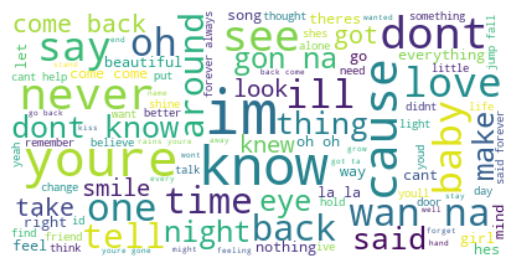

In [15]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(thesentencenppunct)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
thesentencenppunctls = thesentencenppunct.split(" ")

In [17]:
df = pd.value_counts(np.array(thesentencenppunctls))
df_val = pd.DataFrame(df)
df = df_val.reset_index()
df.columns = ["word", "word_count"]

In [18]:
df.shape

(1489, 2)

In [19]:
df.to_csv("words_count_taylorswift.csv", index=False)